In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel("DATA_SCIENCE_SET_25_26.xlsx",sheetname="Sheet1",parse_dates = [3],na_values="0")

In [3]:
#Renaming columns
data=data.rename(columns={"User id":"User_id","Order Date":"Ordered_Date","Order Time":"Ordered_Time","bill value":"Bill_Amount","Home Address":"Home_Address","Office Address":"Office_Address","Family members":"Family_Members","Languages Known":"Languages_Known"})

In [4]:
data.head()

,User_id,Category,Product,Ordered_Date,Ordered_Time,Bill_Amount,Age,Income,Gender,Profession,Home_Address,Unnamed: 11,Unnamed: 12,Office_Address,Unnamed: 14,Unnamed: 15,Family_Members,Languages_Known
0,9123456794,11,4.0,2018-01-01 00:00:00,21:30:00,2000,26,45000,Female,Doctor,17.488666,78.389712,17z(J.N.T.U),17.474387,78.297519,14z(Serilingampally),7,"Malyalam,Telugu and English"
1,9999999978,6,NaN,2018-01-04 00:00:00,22:55:00,2650,30,22000,Female,Entreprenuer,17.400205,78.487070,NaN,17.408753,78.438758,NaN,2,"English, Telugu"
2,9123456782,8,8.0,2018-01-10 00:00:00,14:12:00,25000,24,50000,Female,Engineer,17.518252,78.473257,13z(Bolarum),17.372266,78.482430,15z(Malakpet),4,"Tamil,English and Telugu"
3,9999999975,13,NaN,2018-01-12 00:00:00,10:10:00,750,24,23000,Female,IT Professional,17.424879,78.507825,NaN,17.485128,78.511785,NaN,5,"English, Telugu"
4,9123456790,9,1.0,2018-01-21 00:00:00,13:40:00,8700,28,60000,Female,Business,17.443972,78.304755,13z(Gachibowli),17.496319,78.540321,14z(Sainikpuri),4,Telugu and English


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 18 columns):
User_id            220 non-null int64
Category           220 non-null int64
Product            63 non-null float64
Ordered_Date       220 non-null object
Ordered_Time       220 non-null object
Bill_Amount        220 non-null int64
Age                220 non-null int64
Income             220 non-null int64
Gender             220 non-null object
Profession         220 non-null object
Home_Address       220 non-null float64
Unnamed: 11        220 non-null float64
Unnamed: 12        81 non-null object
Office_Address     177 non-null float64
Unnamed: 14        177 non-null float64
Unnamed: 15        81 non-null object
Family_Members     220 non-null int64
Languages_Known    220 non-null object
dtypes: float64(5), int64(6), object(7)
memory usage: 31.0+ KB


In [6]:
data.describe()

,User_id,Category,Product,Bill_Amount,Age,Income,Home_Address,Unnamed: 11,Office_Address,Unnamed: 14,Family_Members
count,2.200000e+02,220.000000,63.000000,220.000000,220.000000,220.000000,220.000000,220.000000,177.000000,177.000000,220.000000
mean,9.672727e+09,6.881818,4.857143,3270.518182,30.150000,30359.090909,17.447873,78.429565,17.448620,78.441800,4.104545
std,4.256123e+08,4.263537,2.787398,6055.698128,11.645849,19188.637217,0.045752,0.062871,0.047535,0.076589,1.986938
min,9.000000e+09,1.000000,1.000000,15.000000,13.000000,0.000000,17.359417,78.297519,17.367942,78.297519,1.000000
25%,9.123457e+09,2.000000,2.000000,546.750000,23.000000,22000.000000,17.426343,78.397276,17.417384,78.370804,3.000000
50%,1.000000e+10,6.000000,5.000000,1500.000000,26.000000,30000.000000,17.443972,78.441017,17.443972,78.465477,4.000000
75%,1.000000e+10,11.000000,7.000000,3000.000000,32.000000,45000.000000,17.496305,78.477818,17.496319,78.511785,5.000000
max,1.000000e+10,14.000000,11.000000,50000.000000,62.000000,100000.000000,17.537030,78.550700,17.537030,78.540321,8.000000


In [7]:
data.isnull().sum()

User_id              0
Category             0
Product            157
Ordered_Date         0
Ordered_Time         0
Bill_Amount          0
Age                  0
Income               0
Gender               0
Profession           0
Home_Address         0
Unnamed: 11          0
Unnamed: 12        139
Office_Address      43
Unnamed: 14         43
Unnamed: 15        139
Family_Members       0
Languages_Known      0
dtype: int64

### Data Preprocessing

In [8]:
#data.User_id.value_counts().sort_index()
data.shape

(220, 18)

### Needs vs Luxury

In [9]:
data.Income.value_counts().sort_index()

0         31
6000       6
15000      1
16000      6
20000      6
22000     12
23000     14
25000     15
28000      2
30000     46
35000      3
37000      8
38000      2
40000      1
42000      4
45000     30
50000     20
60000      5
75000      3
85000      3
100000     2
Name: Income, dtype: int64

In [10]:
data.Income.loc[data.Income==0]=np.round(data.Income.mean(),2)
data.iloc[[31,32,48,50,51,53]]

C:\Users\merus\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,User_id,Category,Product,Ordered_Date,Ordered_Time,Bill_Amount,Age,Income,Gender,Profession,Home_Address,Unnamed: 11,Unnamed: 12,Office_Address,Unnamed: 14,Unnamed: 15,Family_Members,Languages_Known
31,9999999986,13,NaN,2018-02-27 00:00:00,18:03:00,500,13,30359.09,Male,Student,17.496305,78.407876,NaN,NaN,NaN,NaN,3,English
32,9999999986,13,NaN,2018-02-28 00:00:00,19:10:00,500,13,30359.09,Male,Student,17.496305,78.407876,NaN,NaN,NaN,NaN,3,English
48,9999999987,14,NaN,2018-03-27 00:00:00,12:45:00,600,17,30359.09,Female,Student,17.426831,78.430004,NaN,NaN,NaN,NaN,8,"Hindi, English, Marati"
50,9999999987,1,NaN,2018-03-28 00:00:00,21:13:00,1500,17,30359.09,Female,Student,17.426831,78.430004,NaN,NaN,NaN,NaN,8,"Hindi, English, Marati"
51,9999999987,1,NaN,2018-03-29 00:00:00,18:03:00,1500,17,30359.09,Female,Student,17.426831,78.430004,NaN,NaN,NaN,NaN,8,"Hindi, English, Marati"
53,9999999987,10,NaN,2018-03-31 00:00:00,08:50:00,3200,17,30359.09,Female,Student,17.426831,78.430004,NaN,NaN,NaN,NaN,8,"Hindi, English, Marati"


In [11]:
data.groupby(["Category"])["Bill_Amount"].count()

Category
1     38
2     20
3     13
5     12
6     28
7      7
8      3
9     11
10    28
11    29
12     9
13    18
14     4
Name: Bill_Amount, dtype: int64

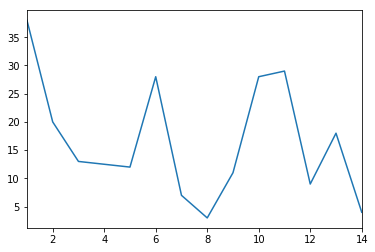

In [12]:
data.Category.value_counts().sort_index().plot()

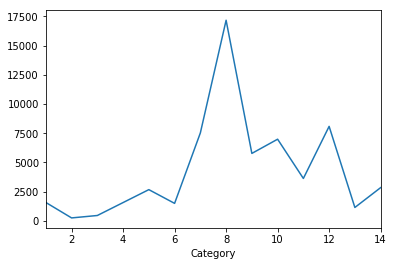

In [13]:
%matplotlib inline
data.groupby(["Category"])["Bill_Amount"].mean().plot()

In [14]:
data.set_index("Category").T.head()

Category,11,6,8,13,9,9,10,10,11,8,...,13,10,9,6,6,2,6,2,1,11
User_id,9123456794,9999999978,9123456782,9999999975,9123456790,9123456789,9123456794,9123456798,9123456799,9123456782,...,9999999974,9999999982,9999999982,9999999983,9999999983,9999999978,9999999983,9999999976,9999999984,9999999989
Product,4,NaN,8,NaN,1,8,7,1,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ordered_Date,2018-01-01 00:00:00,2018-01-04 00:00:00,2018-01-10 00:00:00,2018-01-12 00:00:00,2018-01-21 00:00:00,2018-01-21 00:00:00,2018-01-22 00:00:00,2018-01-23 00:00:00,2018-01-27 00:00:00,2018-01-28 00:00:00,...,2018-12-13 00:00:00,2018-12-14 00:00:00,2018-12-15 00:00:00,2018-12-16 00:00:00,2018-12-17 00:00:00,2018-12-17 00:00:00,2018-12-18 00:00:00,2018-12-30 00:00:00,2018-12-31 00:00:00,05-04-218
Ordered_Time,21:30:00,22:55:00,14:12:00,10:10:00,13:40:00,15:30:00,13:40:00,13:35:00,17:45:00,18:25:00,...,12:45:00,12:45:00,11:10:00,20:25:00,10:25:00,19:00:00,08:55:00,18:30:00,18:55:32,21:00:00
Bill_Amount,2000,2650,25000,750,8700,1500,22000,2200,1400,20000,...,466,1300,1050,400,500,450,750,280,1560,1500


In [15]:
data_2=data.loc[:,["User_id","Category","Bill_Amount","Income"]]
print(data_2.head())
#data_2=data_2.set_index("Category").T

      User_id  Category  Bill_Amount   Income
0  9123456794        11         2000  45000.0
1  9999999978         6         2650  22000.0
2  9123456782         8        25000  50000.0
3  9999999975        13          750  23000.0
4  9123456790         9         8700  60000.0


In [16]:
data_2.Income.value_counts().sort_index()

6000.00       6
15000.00      1
16000.00      6
20000.00      6
22000.00     12
23000.00     14
25000.00     15
28000.00      2
30000.00     46
30359.09     31
35000.00      3
37000.00      8
38000.00      2
40000.00      1
42000.00      4
45000.00     30
50000.00     20
60000.00      5
75000.00      3
85000.00      3
100000.00     2
Name: Income, dtype: int64

In [17]:
data_2["Income_cat"]=data.Income
print(data_2.head())
#data_2.Income_cat.loc[data_2.Income<=50000]=0
#data_2.Income_cat.loc[data_2.Income>50000]=1
#data_2.Income_cat=data_2.Income_cat.astype(int)
#data_2.head()

      User_id  Category  Bill_Amount   Income  Income_cat
0  9123456794        11         2000  45000.0     45000.0
1  9999999978         6         2650  22000.0     22000.0
2  9123456782         8        25000  50000.0     50000.0
3  9999999975        13          750  23000.0     23000.0
4  9123456790         9         8700  60000.0     60000.0


In [18]:
for i in range(0,len(data_2)):
    if data_2.Income.iloc[i] <= 25000:
        data_2.Income_cat.iloc[i]="Lower"
    elif data_2.Income.iloc[i] <= 45000:
        data_2.Income_cat.iloc[i]="Lower_Middle"
    elif data_2.Income.iloc[i] <= 65000:
        data_2.Income_cat.iloc[i]="Upper_Middle"
    elif data_2.Income.iloc[i] > 65000:
        data_2.Income_cat.iloc[i]="High"
        

C:\Users\merus\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
data_2.head()

,User_id,Category,Bill_Amount,Income,Income_cat
0,9123456794,11,2000,45000.0,Lower_Middle
1,9999999978,6,2650,22000.0,Lower
2,9123456782,8,25000,50000.0,Upper_Middle
3,9999999975,13,750,23000.0,Lower
4,9123456790,9,8700,60000.0,Upper_Middle


In [20]:
data_2.Income_cat.iloc[33]

'High'

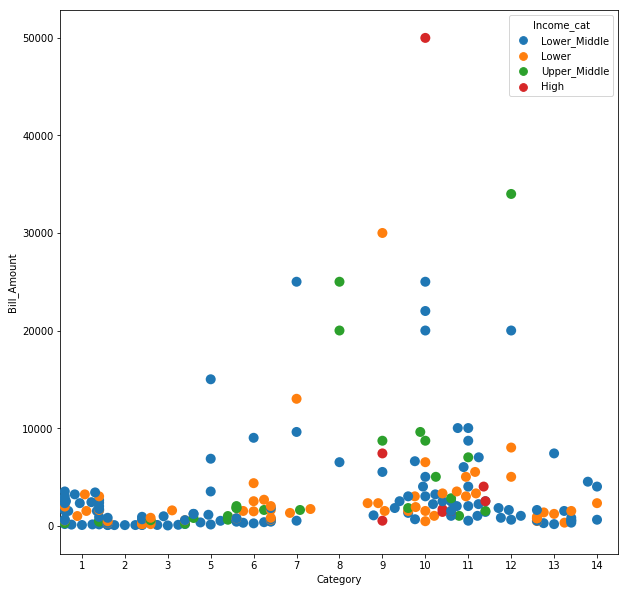

In [21]:
f, ax = plt.subplots(figsize=(10,10
                             ))
sns.swarmplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat,size=10)

In [22]:
#sns.stripplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2, jitter=True,hue=data_2.Income_cat)

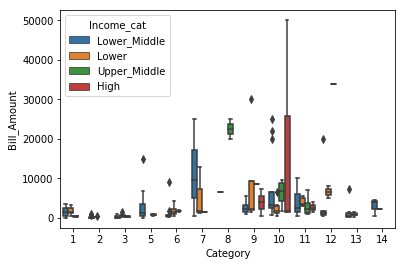

In [23]:
sns.boxplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat,saturation=0.75, width=0.8, dodge=True, fliersize=5 );

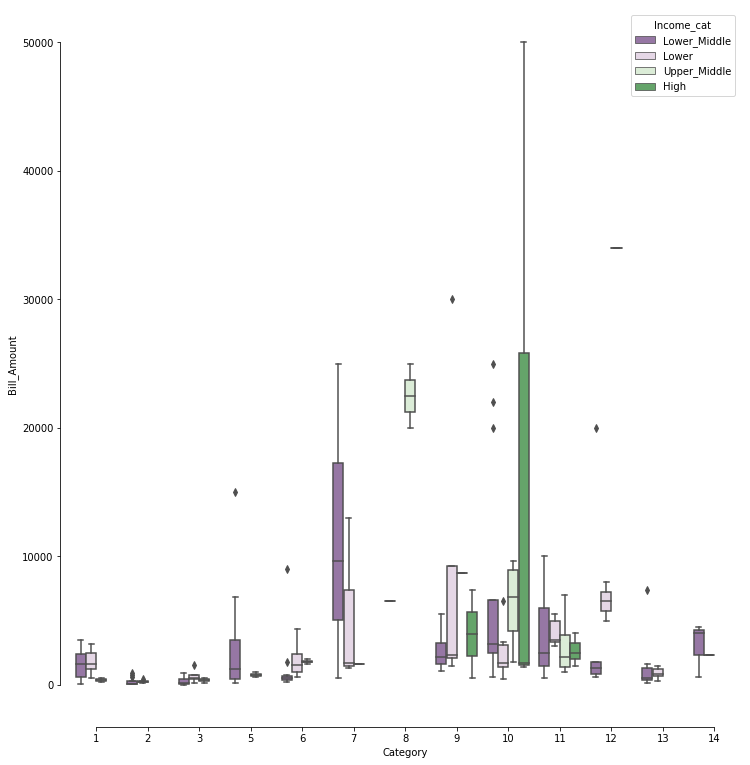

In [24]:
# Draw a nested boxplot 
f, ax = plt.subplots(figsize=(12, 13))
sns.boxplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat, palette="PRGn",orient="v")
sns.despine(offset=10, trim=True)

In [25]:
#f, ax = plt.subplots(figsize=(12, 13))
#sns.violinplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat, palette="PRGn")

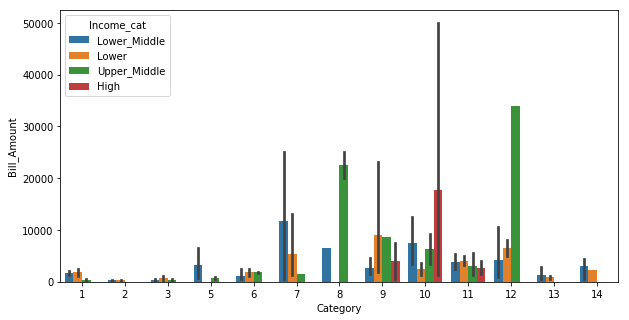

In [26]:
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data_2.Category, y=data_2.Bill_Amount,data=data_2,hue=data_2.Income_cat)

In [27]:
unique_user=data_2.User_id.unique()

In [28]:
unique_user

array([9123456794, 9999999978, 9123456782, 9999999975, 9123456790,
       9123456789, 9123456798, 9123456799, 9123456781, 9123456793,
       9999999981, 9123456787, 9123456785, 9123456780, 9123456792,
       9999999980, 9123456783, 9123456796, 9123456791, 9999999986,
       9123456786, 9999999985, 9999999988, 9999999973, 9999999991,
       9999999987, 9123456788, 9999999983, 9999999982, 9123456797,
       9999999984, 9123456784, 9000000006, 9999999976, 9999999979,
       9999999972, 9999999971, 9999999974, 9123456795, 9999999990,
       9999999989, 9999999977], dtype=int64)

In [29]:
len(unique_user)

42

In [30]:
Users_data=data_2.groupby(["Category"])

In [31]:
for Category,group in Users_data:
    print(Category)
    print(group)
    

1
        User_id  Category  Bill_Amount    Income    Income_cat
16   9123456782         1          400  50000.00  Upper_Middle
26   9999999975         1         1600  23000.00         Lower
35   9999999980         1          980  25000.00         Lower
45   9999999980         1          530  25000.00         Lower
50   9999999987         1         1500  30359.09  Lower_Middle
51   9999999987         1         1500  30359.09  Lower_Middle
59   9123456782         1          550  50000.00  Upper_Middle
68   9999999982         1          888  30000.00  Lower_Middle
72   9999999986         1           60  30359.09  Lower_Middle
75   9999999978         1         3200  22000.00         Lower
92   9999999982         1          100  30000.00  Lower_Middle
100  9999999972         1          120  30000.00  Lower_Middle
103  9999999982         1          156  30000.00  Lower_Middle
109  9999999991         1         2300  42000.00  Lower_Middle
113  9999999991         1         2350  42000.00  Low

In [32]:
Users_data.get_group(1)

,User_id,Category,Bill_Amount,Income,Income_cat
16,9123456782,1,400,50000.00,Upper_Middle
26,9999999975,1,1600,23000.00,Lower
35,9999999980,1,980,25000.00,Lower
45,9999999980,1,530,25000.00,Lower
50,9999999987,1,1500,30359.09,Lower_Middle
51,9999999987,1,1500,30359.09,Lower_Middle
59,9123456782,1,550,50000.00,Upper_Middle
68,9999999982,1,888,30000.00,Lower_Middle
72,9999999986,1,60,30359.09,Lower_Middle
75,9999999978,1,3200,22000.00,Lower


In [33]:
Users1_data=data_2.groupby(["User_id"])

In [34]:
for User_id,grp in Users1_data:
    print(User_id)
    print(grp)

9000000006
       User_id  Category  Bill_Amount   Income    Income_cat
86  9000000006        11        10000  35000.0  Lower_Middle
9123456780
        User_id  Category  Bill_Amount   Income    Income_cat
17   9123456780        11        10000  30000.0  Lower_Middle
36   9123456780         8         6500  30000.0  Lower_Middle
40   9123456780        10         3000  30000.0  Lower_Middle
117  9123456780         9         1800  30000.0  Lower_Middle
118  9123456780        11         2500  30000.0  Lower_Middle
122  9123456780        10         3000  30000.0  Lower_Middle
124  9123456780         9         2500  30000.0  Lower_Middle
128  9123456780        11         4000  30000.0  Lower_Middle
155  9123456780        11         7000  30000.0  Lower_Middle
9123456781
        User_id  Category  Bill_Amount   Income    Income_cat
10   9123456781        10        25000  30000.0  Lower_Middle
129  9123456781        11         2500  30000.0  Lower_Middle
9123456782
        User_id  Category  B

In [35]:
print(Users1_data.keys)
print(Users1_data.groups.keys())

['User_id']
dict_keys([9000000006, 9123456780, 9123456781, 9123456782, 9123456783, 9123456784, 9123456785, 9123456786, 9123456787, 9123456788, 9123456789, 9123456790, 9123456791, 9123456792, 9123456793, 9123456794, 9123456795, 9123456796, 9123456797, 9123456798, 9123456799, 9999999971, 9999999972, 9999999973, 9999999974, 9999999975, 9999999976, 9999999977, 9999999978, 9999999979, 9999999980, 9999999981, 9999999982, 9999999983, 9999999984, 9999999985, 9999999986, 9999999987, 9999999988, 9999999989, 9999999990, 9999999991])


In [36]:
list_1=list(Users1_data.groups.keys())
new_df=Users1_data.mean()
new_df.head()
new_df.columns

Index(['Category', 'Bill_Amount', 'Income'], dtype='object')

In [37]:
#f, ax = plt.subplots(figsize=(10,5))
#sns.barplot(x=new_df.Category, y=new_df.Bill_Amount,data=new_df,size=10)

In [38]:
Users2_data=data_2.groupby(["User_id","Category"])
type(Users2_data)
print(Users2_data.keys)

['User_id', 'Category']


In [39]:
for User_id,grp in Users2_data:
    print(User_id)
    print(grp)

(9000000006, 11)
       User_id  Category  Bill_Amount   Income    Income_cat
86  9000000006        11        10000  35000.0  Lower_Middle
(9123456780, 8)
       User_id  Category  Bill_Amount   Income    Income_cat
36  9123456780         8         6500  30000.0  Lower_Middle
(9123456780, 9)
        User_id  Category  Bill_Amount   Income    Income_cat
117  9123456780         9         1800  30000.0  Lower_Middle
124  9123456780         9         2500  30000.0  Lower_Middle
(9123456780, 10)
        User_id  Category  Bill_Amount   Income    Income_cat
40   9123456780        10         3000  30000.0  Lower_Middle
122  9123456780        10         3000  30000.0  Lower_Middle
(9123456780, 11)
        User_id  Category  Bill_Amount   Income    Income_cat
17   9123456780        11        10000  30000.0  Lower_Middle
118  9123456780        11         2500  30000.0  Lower_Middle
128  9123456780        11         4000  30000.0  Lower_Middle
155  9123456780        11         7000  30000.0  Lowe

28  9123456796        10        20000  28000.0  Lower_Middle
(9123456796, 11)
       User_id  Category  Bill_Amount   Income    Income_cat
49  9123456796        11         2500  28000.0  Lower_Middle
(9123456797, 10)
        User_id  Category  Bill_Amount   Income Income_cat
123  9123456797        10         1500  20000.0      Lower
(9123456797, 11)
       User_id  Category  Bill_Amount   Income Income_cat
66  9123456797        11         3500  20000.0      Lower
(9123456798, 10)
      User_id  Category  Bill_Amount   Income    Income_cat
7  9123456798        10         2200  38000.0  Lower_Middle
(9123456798, 11)
       User_id  Category  Bill_Amount   Income    Income_cat
46  9123456798        11         2000  38000.0  Lower_Middle
(9123456799, 10)
       User_id  Category  Bill_Amount   Income    Income_cat
13  9123456799        10         4000  45000.0  Lower_Middle
(9123456799, 11)
      User_id  Category  Bill_Amount   Income    Income_cat
8  9123456799        11         1400  45

In [40]:
Users2_data.groups.keys()


dict_keys([(9000000006, 11), (9123456780, 8), (9123456780, 9), (9123456780, 10), (9123456780, 11), (9123456781, 10), (9123456781, 11), (9123456782, 1), (9123456782, 5), (9123456782, 6), (9123456782, 8), (9123456782, 10), (9123456782, 11), (9123456782, 12), (9123456783, 6), (9123456783, 7), (9123456783, 9), (9123456783, 10), (9123456783, 11), (9123456783, 12), (9123456783, 13), (9123456783, 14), (9123456784, 10), (9123456784, 11), (9123456785, 9), (9123456785, 10), (9123456785, 11), (9123456786, 9), (9123456786, 10), (9123456786, 11), (9123456787, 9), (9123456787, 10), (9123456787, 11), (9123456788, 11), (9123456789, 9), (9123456789, 10), (9123456789, 11), (9123456790, 9), (9123456790, 10), (9123456790, 11), (9123456791, 9), (9123456791, 10), (9123456791, 11), (9123456792, 10), (9123456792, 11), (9123456793, 10), (9123456793, 11), (9123456794, 10), (9123456794, 11), (9123456795, 10), (9123456795, 11), (9123456796, 10), (9123456796, 11), (9123456797, 10), (9123456797, 11), (9123456798, 1

In [41]:
p=Users2_data.mean()
print(type(p))
p.head()

<class 'pandas.core.frame.DataFrame'>


Bill_Amount   Income
User_id    Category                      
9000000006 11            10000.0  35000.0
9123456780 8              6500.0  30000.0
           9              2150.0  30000.0
           10             3000.0  30000.0
           11             5875.0  30000.0

In [42]:
print(p.columns)

Index(['Bill_Amount', 'Income'], dtype='object')


In [43]:
print(Users2_data.keys)
Users2_data.keys[1]
#Users2_data.groups

['User_id', 'Category']


'Category'

In [44]:
Users2_data.get_group((9000000006,11))

,User_id,Category,Bill_Amount,Income,Income_cat
86,9000000006,11,10000,35000.0,Lower_Middle


In [45]:
keys=list(Users2_data.groups.keys())
keys

[(9000000006, 11),
 (9123456780, 8),
 (9123456780, 9),
 (9123456780, 10),
 (9123456780, 11),
 (9123456781, 10),
 (9123456781, 11),
 (9123456782, 1),
 (9123456782, 5),
 (9123456782, 6),
 (9123456782, 8),
 (9123456782, 10),
 (9123456782, 11),
 (9123456782, 12),
 (9123456783, 6),
 (9123456783, 7),
 (9123456783, 9),
 (9123456783, 10),
 (9123456783, 11),
 (9123456783, 12),
 (9123456783, 13),
 (9123456783, 14),
 (9123456784, 10),
 (9123456784, 11),
 (9123456785, 9),
 (9123456785, 10),
 (9123456785, 11),
 (9123456786, 9),
 (9123456786, 10),
 (9123456786, 11),
 (9123456787, 9),
 (9123456787, 10),
 (9123456787, 11),
 (9123456788, 11),
 (9123456789, 9),
 (9123456789, 10),
 (9123456789, 11),
 (9123456790, 9),
 (9123456790, 10),
 (9123456790, 11),
 (9123456791, 9),
 (9123456791, 10),
 (9123456791, 11),
 (9123456792, 10),
 (9123456792, 11),
 (9123456793, 10),
 (9123456793, 11),
 (9123456794, 10),
 (9123456794, 11),
 (9123456795, 10),
 (9123456795, 11),
 (9123456796, 10),
 (9123456796, 11),
 (912345

In [46]:
keys[0]

(9000000006, 11)

In [47]:
[x[1] for x in keys]

[11,
 8,
 9,
 10,
 11,
 10,
 11,
 1,
 5,
 6,
 8,
 10,
 11,
 12,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 10,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 9,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 10,
 11,
 7,
 1,
 2,
 3,
 10,
 13,
 1,
 2,
 3,
 6,
 7,
 13,
 1,
 6,
 13,
 1,
 2,
 3,
 6,
 13,
 1,
 2,
 3,
 6,
 7,
 10,
 12,
 13,
 2,
 10,
 13,
 1,
 3,
 6,
 9,
 2,
 3,
 7,
 12,
 14,
 1,
 2,
 3,
 5,
 6,
 9,
 10,
 11,
 13,
 6,
 1,
 2,
 1,
 3,
 5,
 7,
 1,
 13,
 1,
 2,
 6,
 10,
 11,
 14,
 5,
 10,
 11,
 2,
 1,
 5]

In [48]:
p_df=pd.DataFrame()
for key in keys:
    p_df=p_df.append(Users2_data.get_group(key))

print(p_df)

    

        User_id  Category  Bill_Amount     Income    Income_cat
86   9000000006        11        10000   35000.00  Lower_Middle
36   9123456780         8         6500   30000.00  Lower_Middle
117  9123456780         9         1800   30000.00  Lower_Middle
124  9123456780         9         2500   30000.00  Lower_Middle
40   9123456780        10         3000   30000.00  Lower_Middle
122  9123456780        10         3000   30000.00  Lower_Middle
17   9123456780        11        10000   30000.00  Lower_Middle
118  9123456780        11         2500   30000.00  Lower_Middle
128  9123456780        11         4000   30000.00  Lower_Middle
155  9123456780        11         7000   30000.00  Lower_Middle
10   9123456781        10        25000   30000.00  Lower_Middle
129  9123456781        11         2500   30000.00  Lower_Middle
16   9123456782         1          400   50000.00  Upper_Middle
59   9123456782         1          550   50000.00  Upper_Middle
120  9123456782         5          600  

In [49]:
p_df.head()

,User_id,Category,Bill_Amount,Income,Income_cat
86,9000000006,11,10000,35000.0,Lower_Middle
36,9123456780,8,6500,30000.0,Lower_Middle
117,9123456780,9,1800,30000.0,Lower_Middle
124,9123456780,9,2500,30000.0,Lower_Middle
40,9123456780,10,3000,30000.0,Lower_Middle


In [50]:
p_df=data_2.groupby(["User_id","Category"]).mean().reset_index()
p_df

,User_id,Category,Bill_Amount,Income
0,9000000006,11,10000.000000,35000.00
1,9123456780,8,6500.000000,30000.00
2,9123456780,9,2150.000000,30000.00
3,9123456780,10,3000.000000,30000.00
4,9123456780,11,5875.000000,30000.00
5,9123456781,10,25000.000000,30000.00
6,9123456781,11,2500.000000,30000.00
7,9123456782,1,475.000000,50000.00
8,9123456782,5,600.000000,50000.00
9,9123456782,6,1800.000000,50000.00


In [51]:
p_df["Income_cat"]=""
print(p_df.head())

      User_id  Category  Bill_Amount   Income Income_cat
0  9000000006        11      10000.0  35000.0           
1  9123456780         8       6500.0  30000.0           
2  9123456780         9       2150.0  30000.0           
3  9123456780        10       3000.0  30000.0           
4  9123456780        11       5875.0  30000.0           


In [52]:
for i in range(0,len(p_df)):
    if p_df.Income.iloc[i] <= 25000:
        p_df.Income_cat.iloc[i]="Lower"
    elif p_df.Income.iloc[i] <= 45000:
        p_df.Income_cat.iloc[i]="Lower_Middle"
    elif p_df.Income.iloc[i] <= 65000:
        p_df.Income_cat.iloc[i]="Upper_Middle"
    elif p_df.Income.iloc[i] > 65000:
        p_df.Income_cat.iloc[i]="High"

C:\Users\merus\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
p_df.head()

,User_id,Category,Bill_Amount,Income,Income_cat
0,9000000006,11,10000.0,35000.0,Lower_Middle
1,9123456780,8,6500.0,30000.0,Lower_Middle
2,9123456780,9,2150.0,30000.0,Lower_Middle
3,9123456780,10,3000.0,30000.0,Lower_Middle
4,9123456780,11,5875.0,30000.0,Lower_Middle


In [54]:
len(p_df.User_id.unique())

42

In [55]:
#p_df["Mean_Bill_Amount"]=""
#cat=p_df.Category.unique()
#print(cat)
#p_df.head()

In [56]:
p_df[p_df.User_id==9123456780]

,User_id,Category,Bill_Amount,Income,Income_cat
1,9123456780,8,6500.0,30000.0,Lower_Middle
2,9123456780,9,2150.0,30000.0,Lower_Middle
3,9123456780,10,3000.0,30000.0,Lower_Middle
4,9123456780,11,5875.0,30000.0,Lower_Middle


In [61]:
#fig, axes = plt.subplots(2for user in p_df.User_id:

In [62]:
p_df

,User_id,Category,Bill_Amount,Income,Income_cat
0,9000000006,11,10000.000000,35000.00,Lower_Middle
1,9123456780,8,6500.000000,30000.00,Lower_Middle
2,9123456780,9,2150.000000,30000.00,Lower_Middle
3,9123456780,10,3000.000000,30000.00,Lower_Middle
4,9123456780,11,5875.000000,30000.00,Lower_Middle
5,9123456781,10,25000.000000,30000.00,Lower_Middle
6,9123456781,11,2500.000000,30000.00,Lower_Middle
7,9123456782,1,475.000000,50000.00,Upper_Middle
8,9123456782,5,600.000000,50000.00,Upper_Middle
9,9123456782,6,1800.000000,50000.00,Upper_Middle


9000000006
0    35000.0
Name: Income, dtype: float64


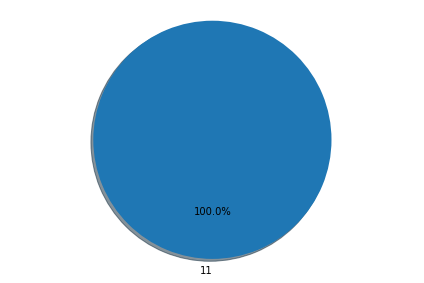

9123456780
1    30000.0
2    30000.0
3    30000.0
4    30000.0
Name: Income, dtype: float64


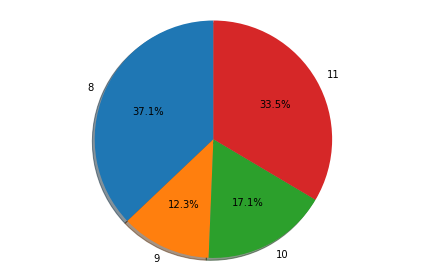

9123456780
1    30000.0
2    30000.0
3    30000.0
4    30000.0
Name: Income, dtype: float64


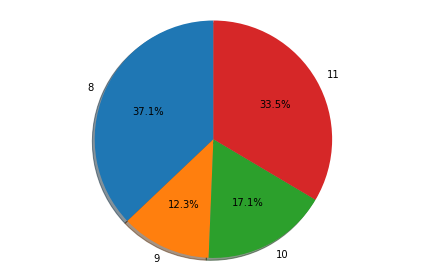

9123456780
1    30000.0
2    30000.0
3    30000.0
4    30000.0
Name: Income, dtype: float64


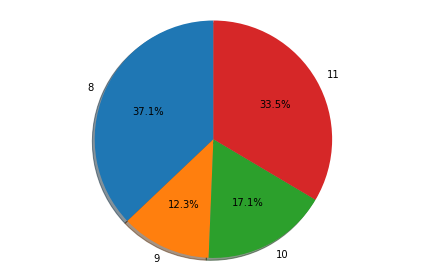

9123456780
1    30000.0
2    30000.0
3    30000.0
4    30000.0
Name: Income, dtype: float64


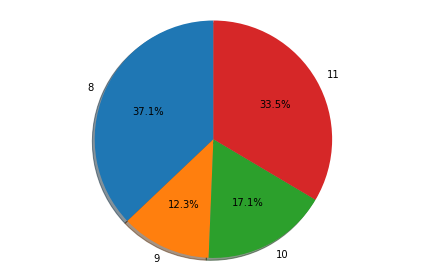

9123456781
5    30000.0
6    30000.0
Name: Income, dtype: float64


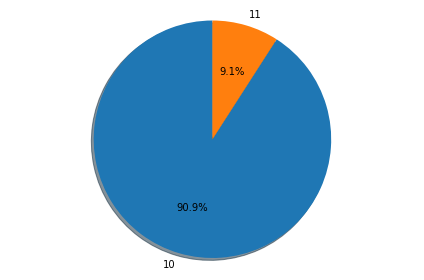

9123456781
5    30000.0
6    30000.0
Name: Income, dtype: float64


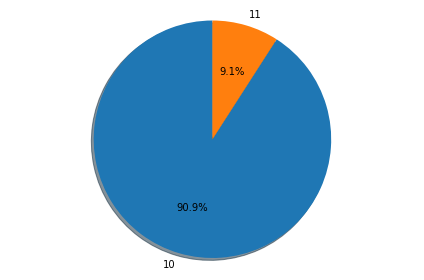

9123456782
7     50000.0
8     50000.0
9     50000.0
10    50000.0
11    50000.0
12    50000.0
13    50000.0
Name: Income, dtype: float64


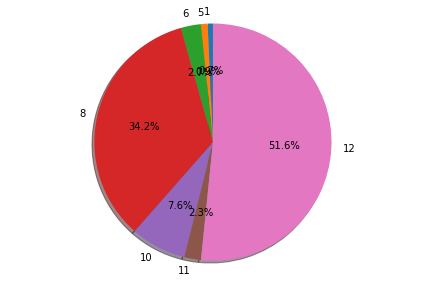

9123456782
7     50000.0
8     50000.0
9     50000.0
10    50000.0
11    50000.0
12    50000.0
13    50000.0
Name: Income, dtype: float64


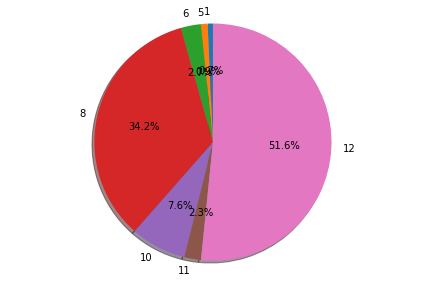

9123456782
7     50000.0
8     50000.0
9     50000.0
10    50000.0
11    50000.0
12    50000.0
13    50000.0
Name: Income, dtype: float64


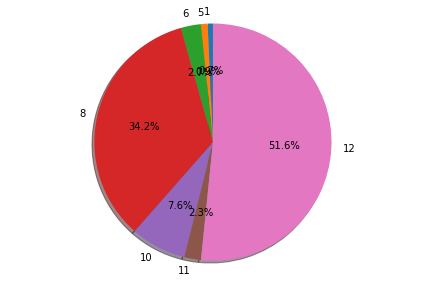

9123456782
7     50000.0
8     50000.0
9     50000.0
10    50000.0
11    50000.0
12    50000.0
13    50000.0
Name: Income, dtype: float64


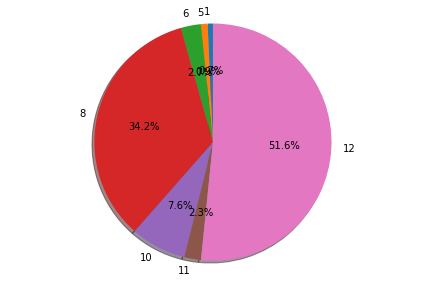

9123456782
7     50000.0
8     50000.0
9     50000.0
10    50000.0
11    50000.0
12    50000.0
13    50000.0
Name: Income, dtype: float64


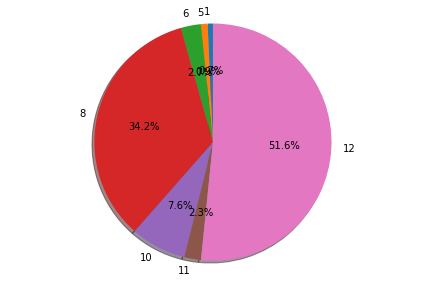

9123456782
7     50000.0
8     50000.0
9     50000.0
10    50000.0
11    50000.0
12    50000.0
13    50000.0
Name: Income, dtype: float64


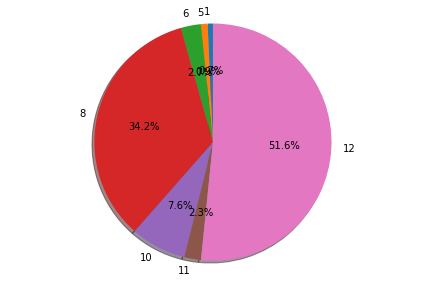

9123456782
7     50000.0
8     50000.0
9     50000.0
10    50000.0
11    50000.0
12    50000.0
13    50000.0
Name: Income, dtype: float64


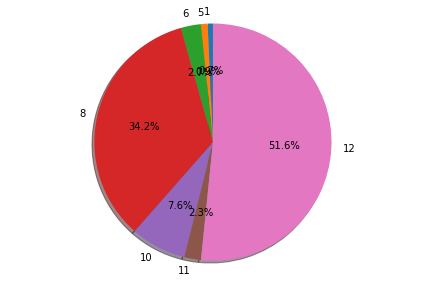

9123456783
14    45000.0
15    45000.0
16    45000.0
17    45000.0
18    45000.0
19    45000.0
20    45000.0
21    45000.0
Name: Income, dtype: float64


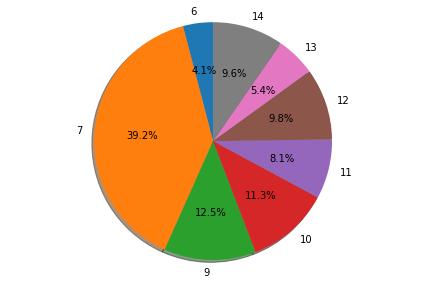

9123456783
14    45000.0
15    45000.0
16    45000.0
17    45000.0
18    45000.0
19    45000.0
20    45000.0
21    45000.0
Name: Income, dtype: float64


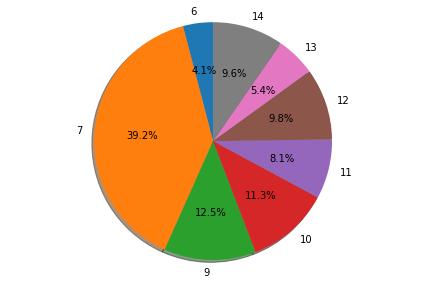

9123456783
14    45000.0
15    45000.0
16    45000.0
17    45000.0
18    45000.0
19    45000.0
20    45000.0
21    45000.0
Name: Income, dtype: float64


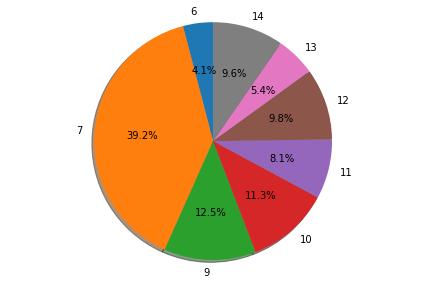

9123456783
14    45000.0
15    45000.0
16    45000.0
17    45000.0
18    45000.0
19    45000.0
20    45000.0
21    45000.0
Name: Income, dtype: float64


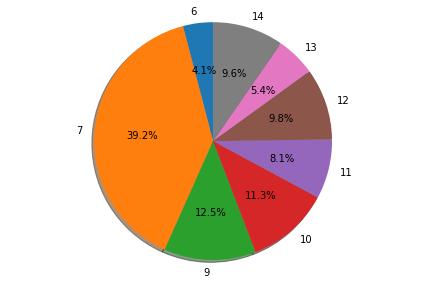

9123456783
14    45000.0
15    45000.0
16    45000.0
17    45000.0
18    45000.0
19    45000.0
20    45000.0
21    45000.0
Name: Income, dtype: float64


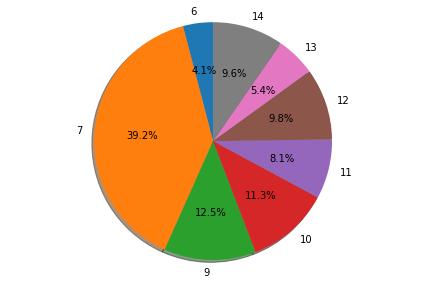

9123456783
14    45000.0
15    45000.0
16    45000.0
17    45000.0
18    45000.0
19    45000.0
20    45000.0
21    45000.0
Name: Income, dtype: float64


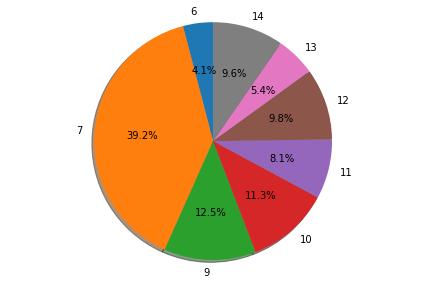

9123456783
14    45000.0
15    45000.0
16    45000.0
17    45000.0
18    45000.0
19    45000.0
20    45000.0
21    45000.0
Name: Income, dtype: float64


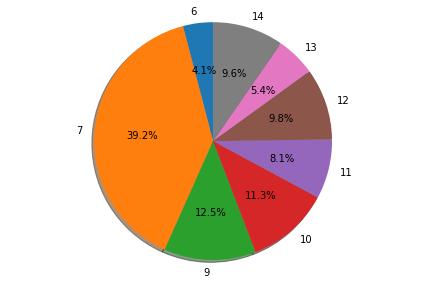

9123456783
14    45000.0
15    45000.0
16    45000.0
17    45000.0
18    45000.0
19    45000.0
20    45000.0
21    45000.0
Name: Income, dtype: float64


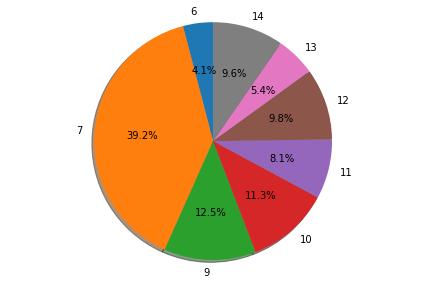

9123456784
22    50000.0
23    50000.0
Name: Income, dtype: float64


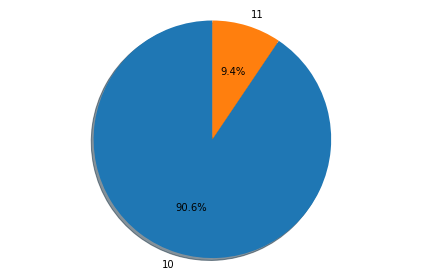

9123456784
22    50000.0
23    50000.0
Name: Income, dtype: float64


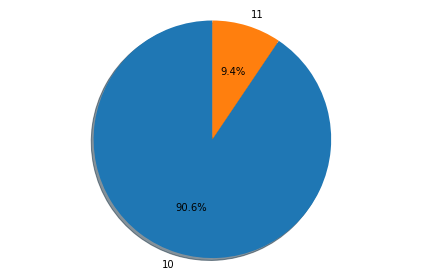

9123456785
24    25000.0
25    25000.0
26    25000.0
Name: Income, dtype: float64


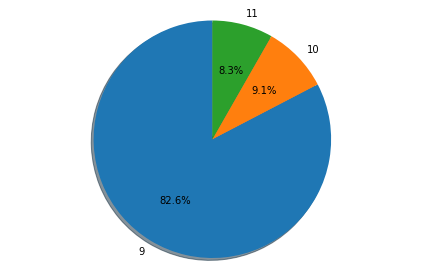

9123456785
24    25000.0
25    25000.0
26    25000.0
Name: Income, dtype: float64


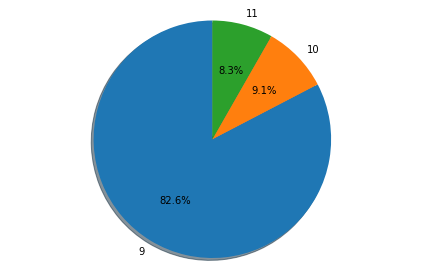

9123456785
24    25000.0
25    25000.0
26    25000.0
Name: Income, dtype: float64


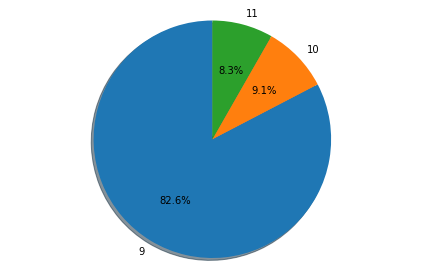

9123456786
27    75000.0
28    75000.0
29    75000.0
Name: Income, dtype: float64


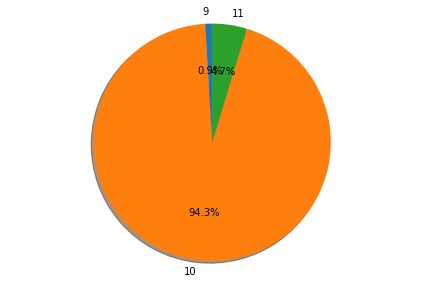

9123456786
27    75000.0
28    75000.0
29    75000.0
Name: Income, dtype: float64


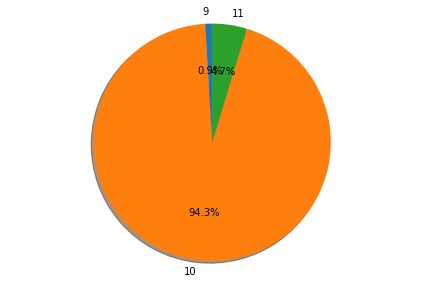

9123456786
27    75000.0
28    75000.0
29    75000.0
Name: Income, dtype: float64


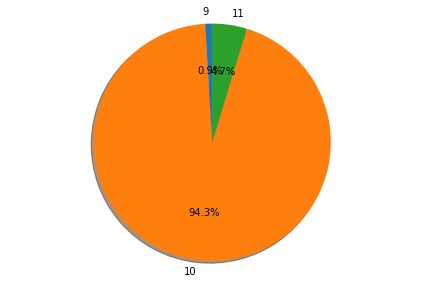

9123456787
30    85000.0
31    85000.0
32    85000.0
Name: Income, dtype: float64


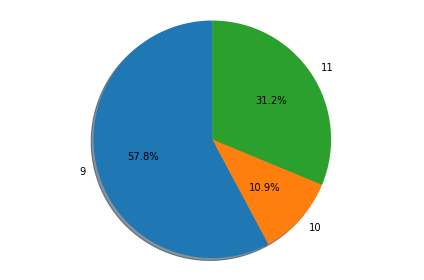

9123456787
30    85000.0
31    85000.0
32    85000.0
Name: Income, dtype: float64


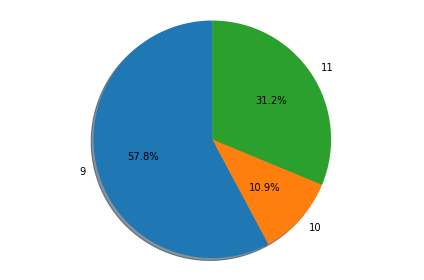

9123456787
30    85000.0
31    85000.0
32    85000.0
Name: Income, dtype: float64


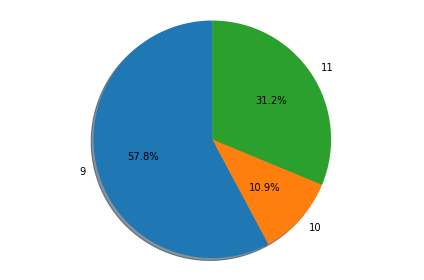

9123456788
33    15000.0
Name: Income, dtype: float64


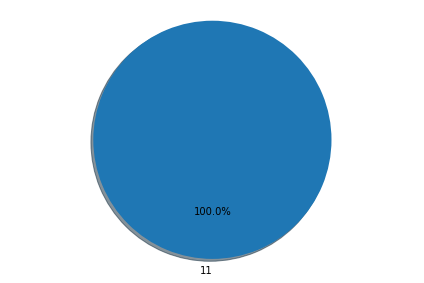

9123456789
34    23000.0
35    23000.0
36    23000.0
Name: Income, dtype: float64


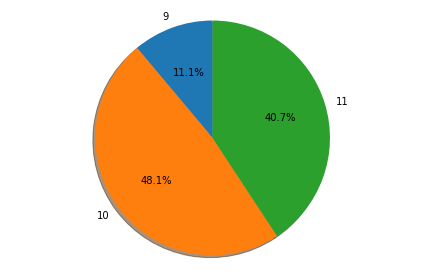

9123456789
34    23000.0
35    23000.0
36    23000.0
Name: Income, dtype: float64


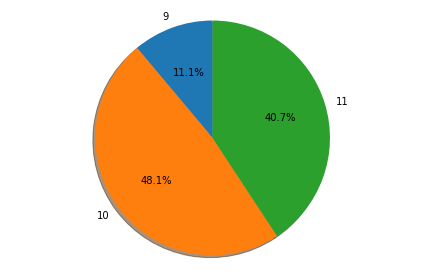

9123456789
34    23000.0
35    23000.0
36    23000.0
Name: Income, dtype: float64


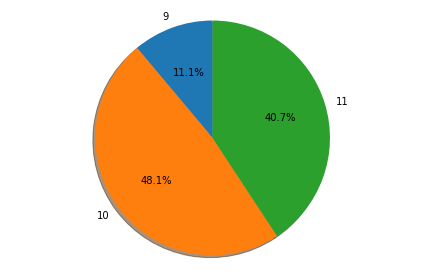

9123456790
37    60000.0
38    60000.0
39    60000.0
Name: Income, dtype: float64


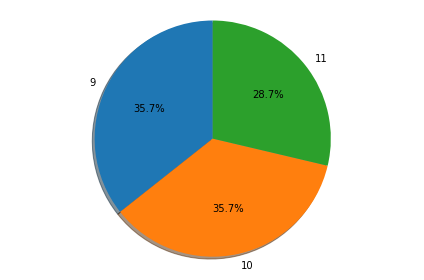

9123456790
37    60000.0
38    60000.0
39    60000.0
Name: Income, dtype: float64


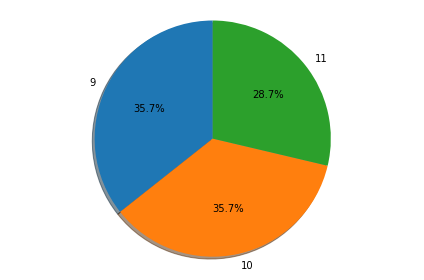

9123456790
37    60000.0
38    60000.0
39    60000.0
Name: Income, dtype: float64


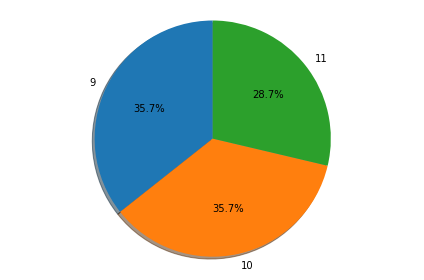

9123456791
40    25000.0
41    25000.0
42    25000.0
Name: Income, dtype: float64


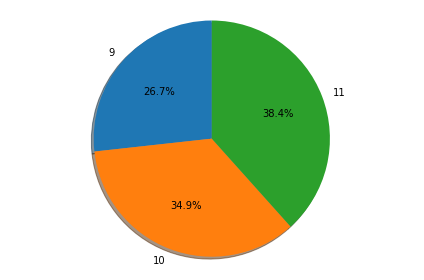

9123456791
40    25000.0
41    25000.0
42    25000.0
Name: Income, dtype: float64


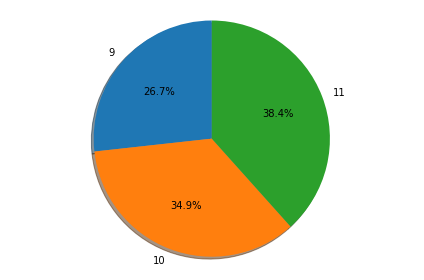

9123456791
40    25000.0
41    25000.0
42    25000.0
Name: Income, dtype: float64


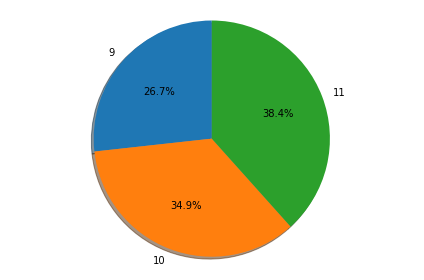

9123456792
43    60000.0
44    60000.0
Name: Income, dtype: float64


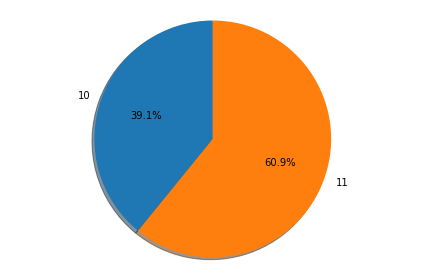

9123456792
43    60000.0
44    60000.0
Name: Income, dtype: float64


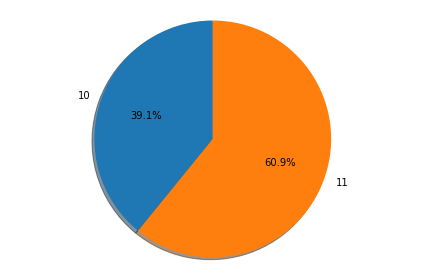

9123456793
45    35000.0
46    35000.0
Name: Income, dtype: float64


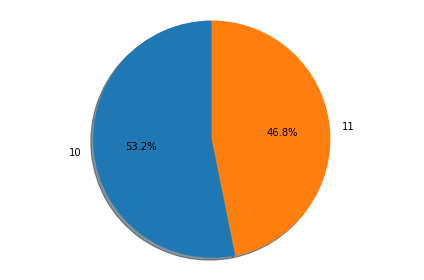

9123456793
45    35000.0
46    35000.0
Name: Income, dtype: float64


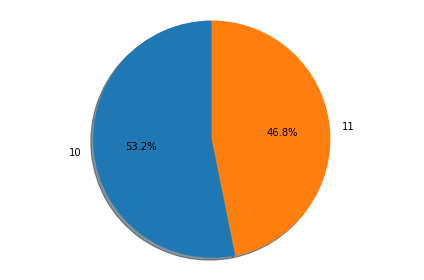

9123456794
47    45000.0
48    45000.0
Name: Income, dtype: float64


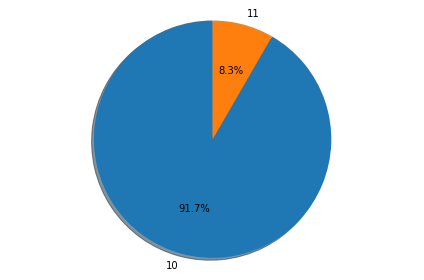

9123456794
47    45000.0
48    45000.0
Name: Income, dtype: float64


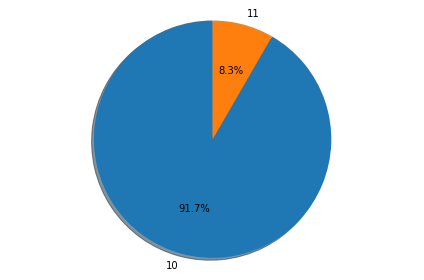

9123456795
49    30000.0
50    30000.0
Name: Income, dtype: float64


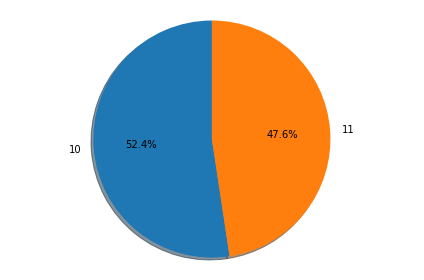

9123456795
49    30000.0
50    30000.0
Name: Income, dtype: float64


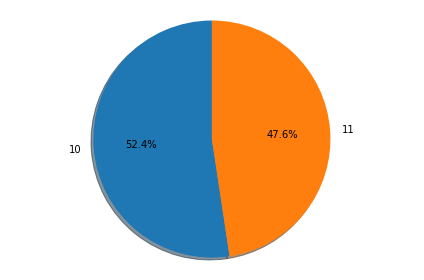

9123456796
51    28000.0
52    28000.0
Name: Income, dtype: float64


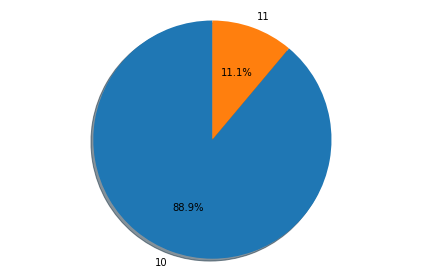

9123456796
51    28000.0
52    28000.0
Name: Income, dtype: float64


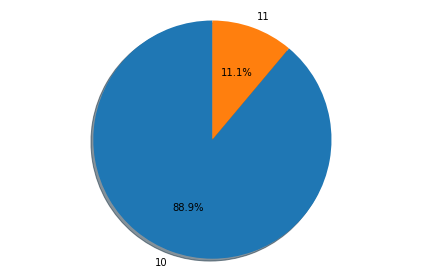

9123456797
53    20000.0
54    20000.0
Name: Income, dtype: float64


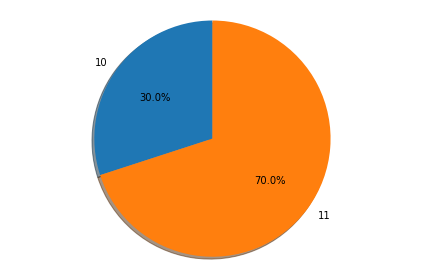

9123456797
53    20000.0
54    20000.0
Name: Income, dtype: float64


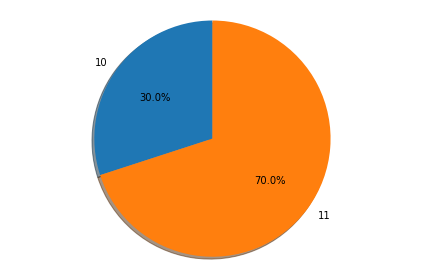

9123456798
55    38000.0
56    38000.0
Name: Income, dtype: float64


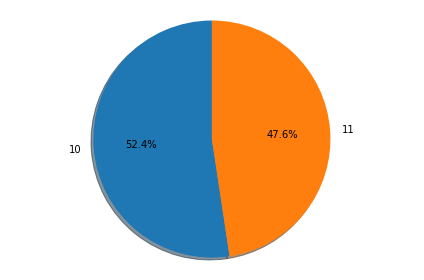

9123456798
55    38000.0
56    38000.0
Name: Income, dtype: float64


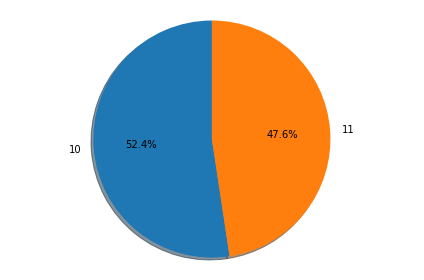

9123456799
57    45000.0
58    45000.0
Name: Income, dtype: float64


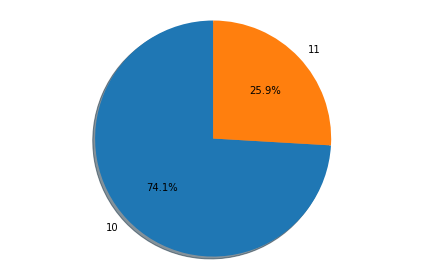

9123456799
57    45000.0
58    45000.0
Name: Income, dtype: float64


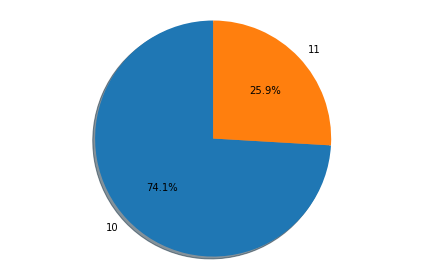

9999999971
59    40000.0
Name: Income, dtype: float64


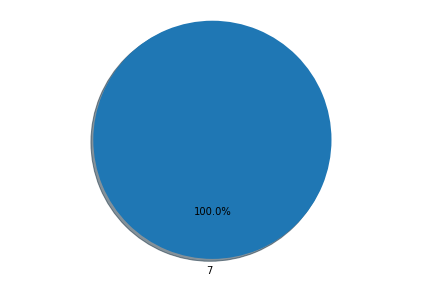

9999999972
60    30000.0
Name: Income, dtype: float64


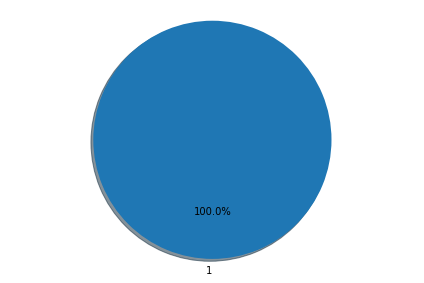

9999999973
61    20000.0
62    20000.0
63    20000.0
64    20000.0
Name: Income, dtype: float64


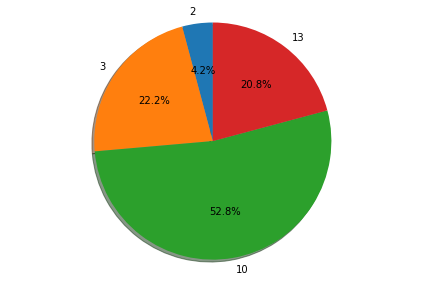

9999999973
61    20000.0
62    20000.0
63    20000.0
64    20000.0
Name: Income, dtype: float64


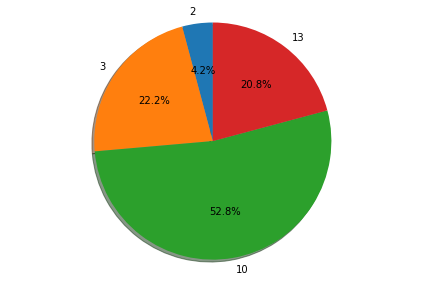

9999999973
61    20000.0
62    20000.0
63    20000.0
64    20000.0
Name: Income, dtype: float64


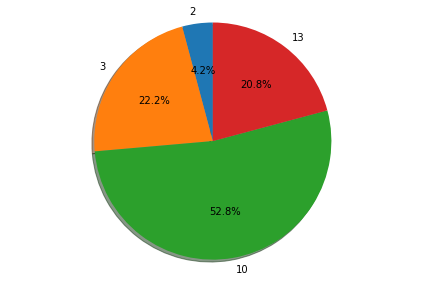

9999999973
61    20000.0
62    20000.0
63    20000.0
64    20000.0
Name: Income, dtype: float64


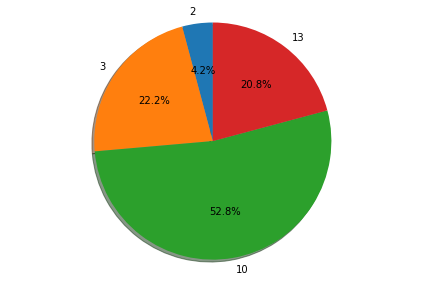

9999999974
65    23000.0
66    23000.0
67    23000.0
68    23000.0
69    23000.0
70    23000.0
Name: Income, dtype: float64


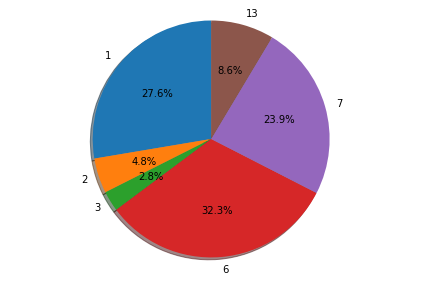

9999999974
65    23000.0
66    23000.0
67    23000.0
68    23000.0
69    23000.0
70    23000.0
Name: Income, dtype: float64


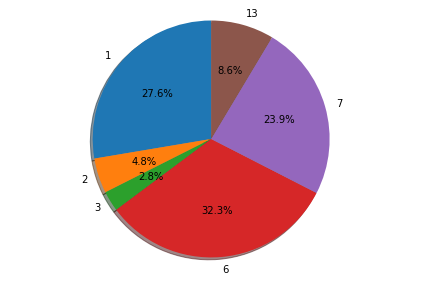

9999999974
65    23000.0
66    23000.0
67    23000.0
68    23000.0
69    23000.0
70    23000.0
Name: Income, dtype: float64


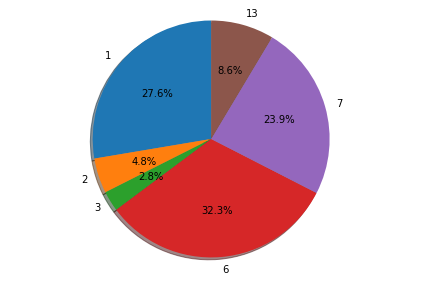

9999999974
65    23000.0
66    23000.0
67    23000.0
68    23000.0
69    23000.0
70    23000.0
Name: Income, dtype: float64


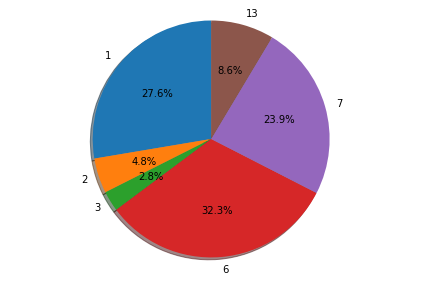

9999999974
65    23000.0
66    23000.0
67    23000.0
68    23000.0
69    23000.0
70    23000.0
Name: Income, dtype: float64


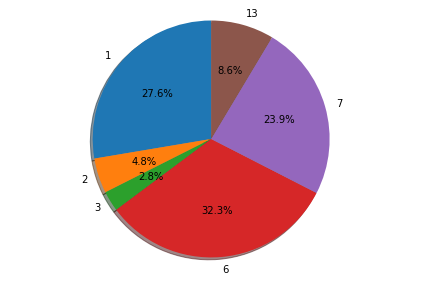

9999999974
65    23000.0
66    23000.0
67    23000.0
68    23000.0
69    23000.0
70    23000.0
Name: Income, dtype: float64


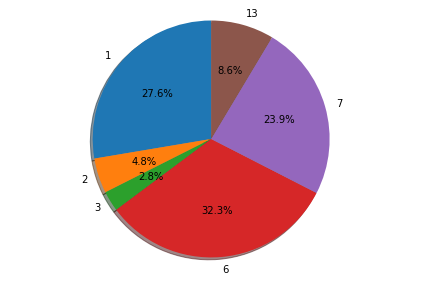

9999999975
71    23000.0
72    23000.0
73    23000.0
Name: Income, dtype: float64


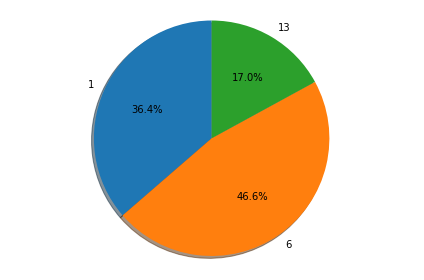

9999999975
71    23000.0
72    23000.0
73    23000.0
Name: Income, dtype: float64


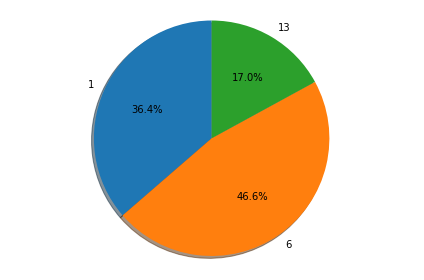

9999999975
71    23000.0
72    23000.0
73    23000.0
Name: Income, dtype: float64


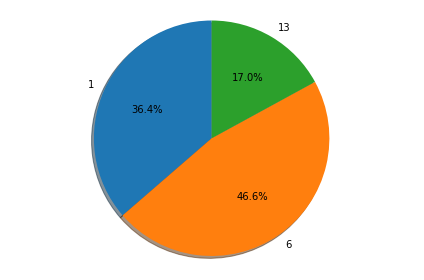

9999999976
74    30359.09
75    30359.09
76    30359.09
Name: Income, dtype: float64


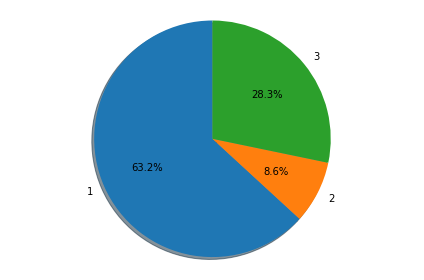

9999999976
74    30359.09
75    30359.09
76    30359.09
Name: Income, dtype: float64


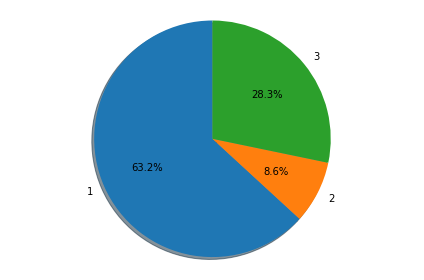

9999999976
74    30359.09
75    30359.09
76    30359.09
Name: Income, dtype: float64


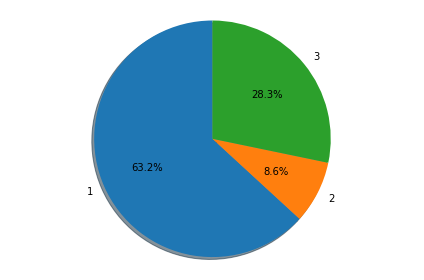

9999999977
77    25000.0
78    25000.0
Name: Income, dtype: float64


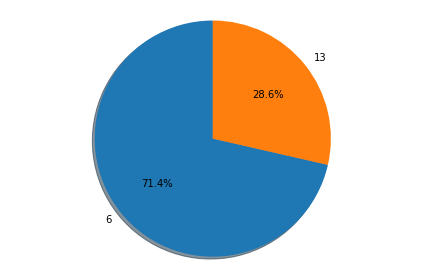

9999999977
77    25000.0
78    25000.0
Name: Income, dtype: float64


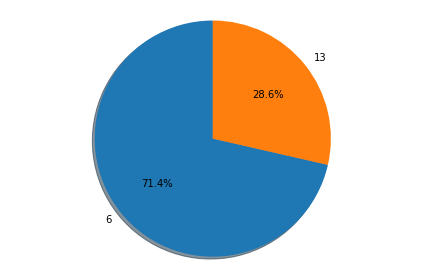

9999999978
79    22000.0
80    22000.0
81    22000.0
82    22000.0
83    22000.0
84    22000.0
85    22000.0
86    22000.0
Name: Income, dtype: float64


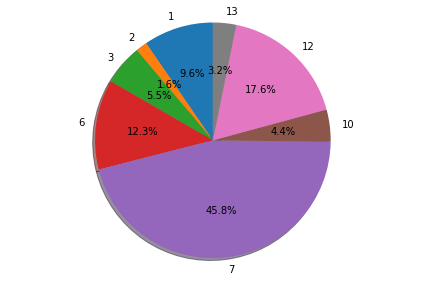

9999999978
79    22000.0
80    22000.0
81    22000.0
82    22000.0
83    22000.0
84    22000.0
85    22000.0
86    22000.0
Name: Income, dtype: float64


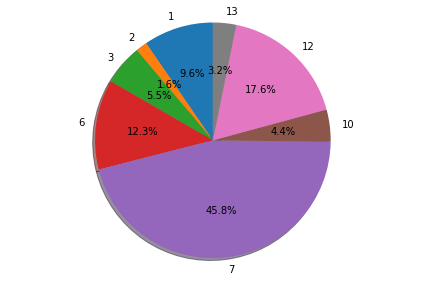

9999999978
79    22000.0
80    22000.0
81    22000.0
82    22000.0
83    22000.0
84    22000.0
85    22000.0
86    22000.0
Name: Income, dtype: float64


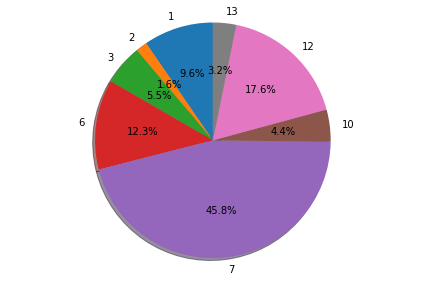

9999999978
79    22000.0
80    22000.0
81    22000.0
82    22000.0
83    22000.0
84    22000.0
85    22000.0
86    22000.0
Name: Income, dtype: float64


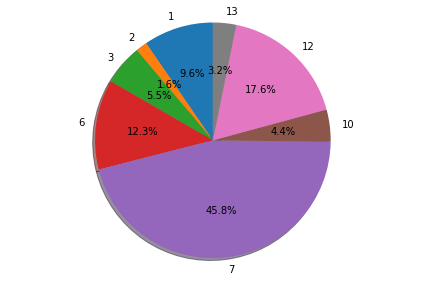

9999999978
79    22000.0
80    22000.0
81    22000.0
82    22000.0
83    22000.0
84    22000.0
85    22000.0
86    22000.0
Name: Income, dtype: float64


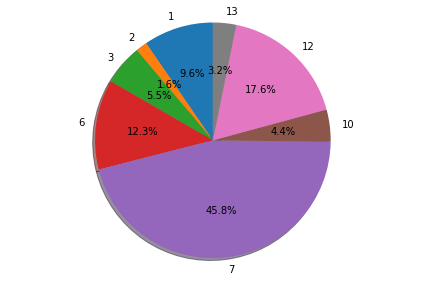

9999999978
79    22000.0
80    22000.0
81    22000.0
82    22000.0
83    22000.0
84    22000.0
85    22000.0
86    22000.0
Name: Income, dtype: float64


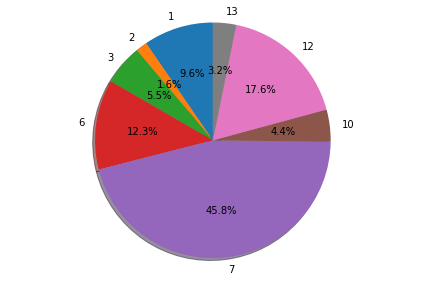

9999999978
79    22000.0
80    22000.0
81    22000.0
82    22000.0
83    22000.0
84    22000.0
85    22000.0
86    22000.0
Name: Income, dtype: float64


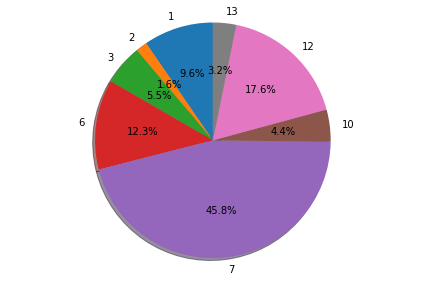

9999999978
79    22000.0
80    22000.0
81    22000.0
82    22000.0
83    22000.0
84    22000.0
85    22000.0
86    22000.0
Name: Income, dtype: float64


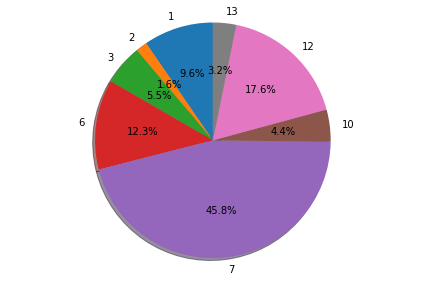

9999999979
87    6000.0
88    6000.0
89    6000.0
Name: Income, dtype: float64


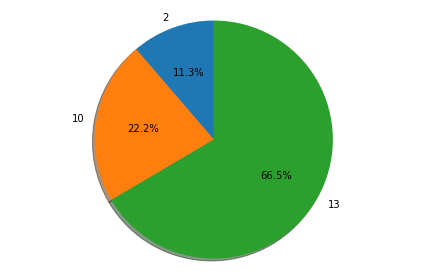

9999999979
87    6000.0
88    6000.0
89    6000.0
Name: Income, dtype: float64


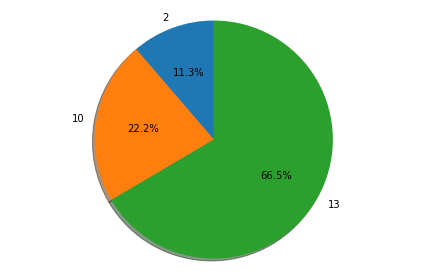

9999999979
87    6000.0
88    6000.0
89    6000.0
Name: Income, dtype: float64


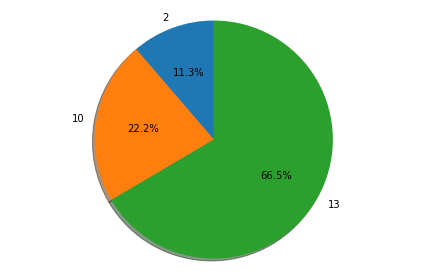

9999999980
90    25000.0
91    25000.0
92    25000.0
93    25000.0
Name: Income, dtype: float64


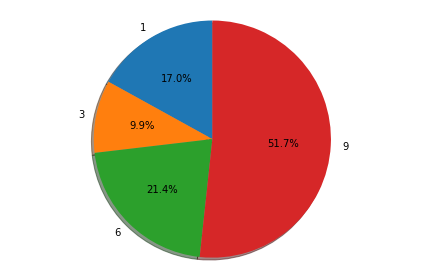

9999999980
90    25000.0
91    25000.0
92    25000.0
93    25000.0
Name: Income, dtype: float64


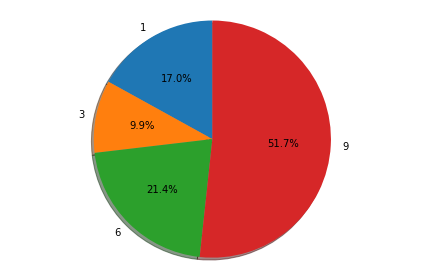

9999999980
90    25000.0
91    25000.0
92    25000.0
93    25000.0
Name: Income, dtype: float64


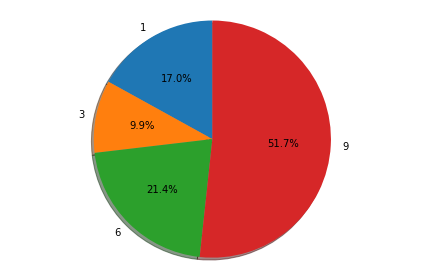

9999999980
90    25000.0
91    25000.0
92    25000.0
93    25000.0
Name: Income, dtype: float64


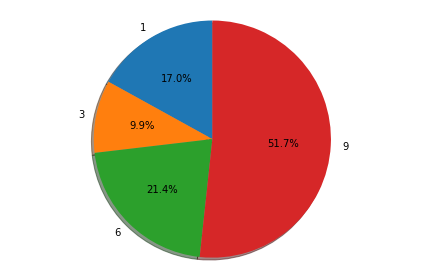

9999999981
94    16000.0
95    16000.0
96    16000.0
97    16000.0
98    16000.0
Name: Income, dtype: float64


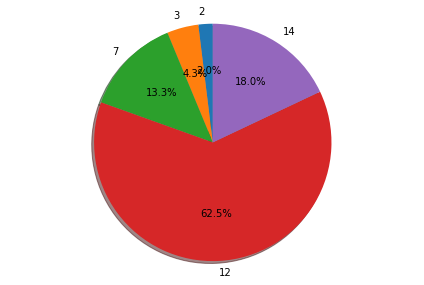

9999999981
94    16000.0
95    16000.0
96    16000.0
97    16000.0
98    16000.0
Name: Income, dtype: float64


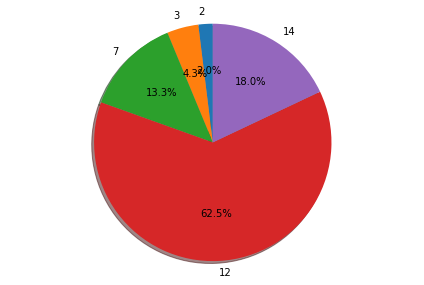

9999999981
94    16000.0
95    16000.0
96    16000.0
97    16000.0
98    16000.0
Name: Income, dtype: float64


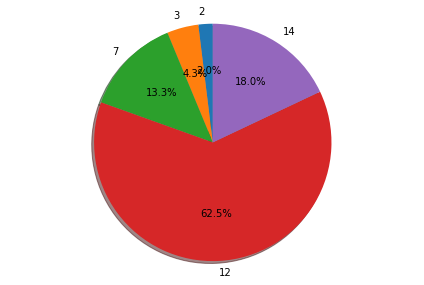

9999999981
94    16000.0
95    16000.0
96    16000.0
97    16000.0
98    16000.0
Name: Income, dtype: float64


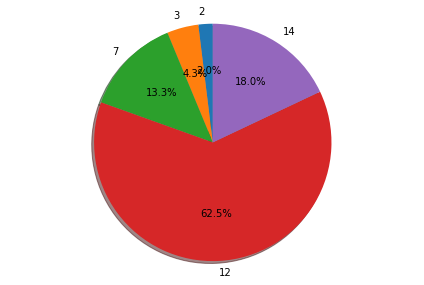

9999999981
94    16000.0
95    16000.0
96    16000.0
97    16000.0
98    16000.0
Name: Income, dtype: float64


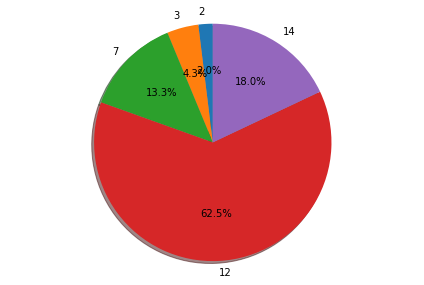

9999999982
99     30000.0
100    30000.0
101    30000.0
102    30000.0
103    30000.0
104    30000.0
105    30000.0
106    30000.0
107    30000.0
Name: Income, dtype: float64


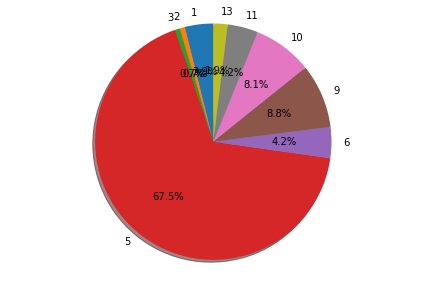

9999999982
99     30000.0
100    30000.0
101    30000.0
102    30000.0
103    30000.0
104    30000.0
105    30000.0
106    30000.0
107    30000.0
Name: Income, dtype: float64


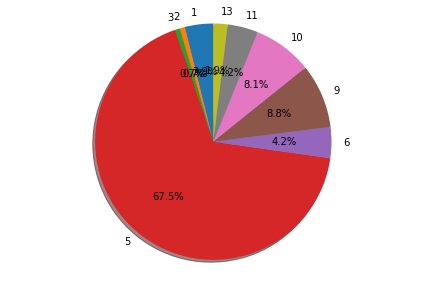

9999999982
99     30000.0
100    30000.0
101    30000.0
102    30000.0
103    30000.0
104    30000.0
105    30000.0
106    30000.0
107    30000.0
Name: Income, dtype: float64


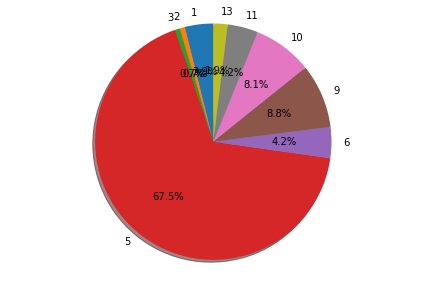

9999999982
99     30000.0
100    30000.0
101    30000.0
102    30000.0
103    30000.0
104    30000.0
105    30000.0
106    30000.0
107    30000.0
Name: Income, dtype: float64


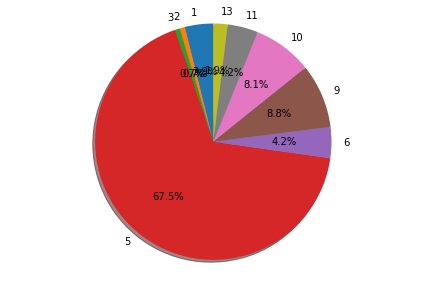

9999999982
99     30000.0
100    30000.0
101    30000.0
102    30000.0
103    30000.0
104    30000.0
105    30000.0
106    30000.0
107    30000.0
Name: Income, dtype: float64


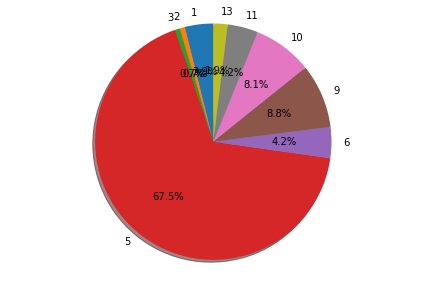

9999999982
99     30000.0
100    30000.0
101    30000.0
102    30000.0
103    30000.0
104    30000.0
105    30000.0
106    30000.0
107    30000.0
Name: Income, dtype: float64


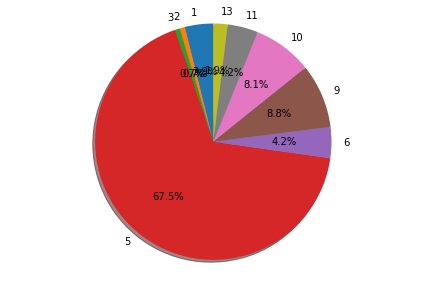

9999999982
99     30000.0
100    30000.0
101    30000.0
102    30000.0
103    30000.0
104    30000.0
105    30000.0
106    30000.0
107    30000.0
Name: Income, dtype: float64


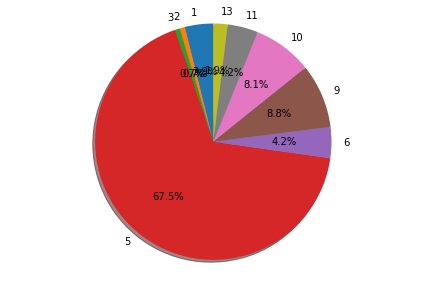

9999999982
99     30000.0
100    30000.0
101    30000.0
102    30000.0
103    30000.0
104    30000.0
105    30000.0
106    30000.0
107    30000.0
Name: Income, dtype: float64


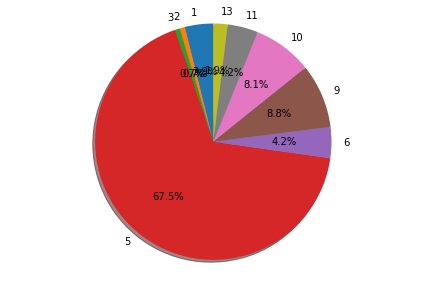

9999999982
99     30000.0
100    30000.0
101    30000.0
102    30000.0
103    30000.0
104    30000.0
105    30000.0
106    30000.0
107    30000.0
Name: Income, dtype: float64


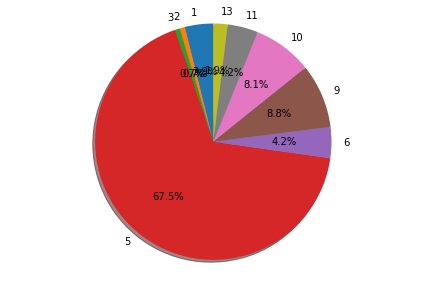

9999999983
108    37000.0
Name: Income, dtype: float64


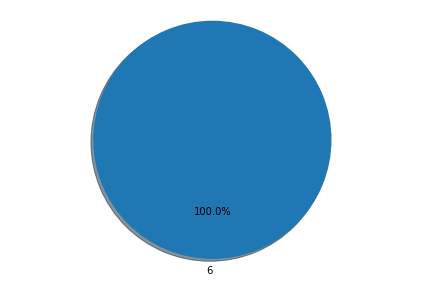

9999999984
109    30359.09
110    30359.09
Name: Income, dtype: float64


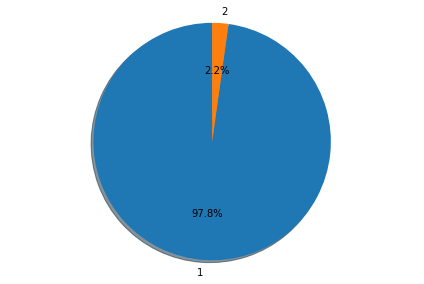

9999999984
109    30359.09
110    30359.09
Name: Income, dtype: float64


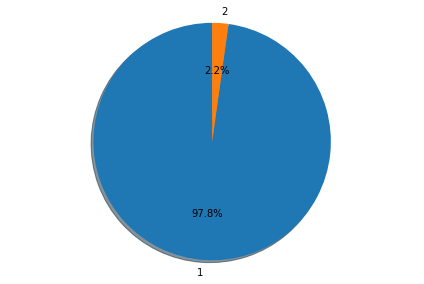

9999999985
111    50000.0
112    50000.0
113    50000.0
114    50000.0
Name: Income, dtype: float64


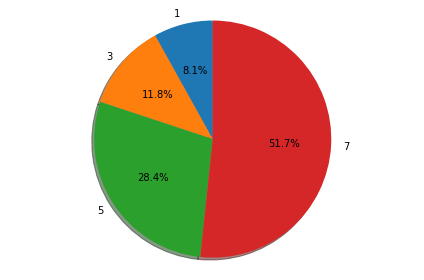

9999999985
111    50000.0
112    50000.0
113    50000.0
114    50000.0
Name: Income, dtype: float64


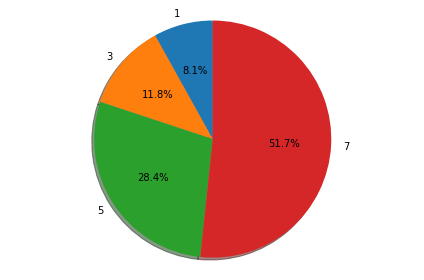

9999999985
111    50000.0
112    50000.0
113    50000.0
114    50000.0
Name: Income, dtype: float64


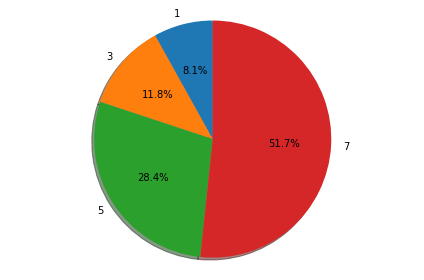

9999999985
111    50000.0
112    50000.0
113    50000.0
114    50000.0
Name: Income, dtype: float64


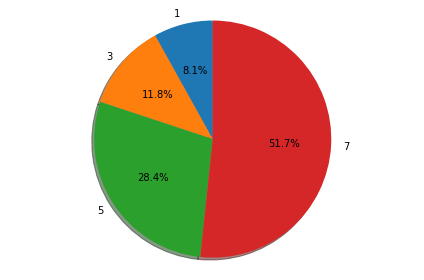

9999999986
115    30359.09
116    30359.09
Name: Income, dtype: float64


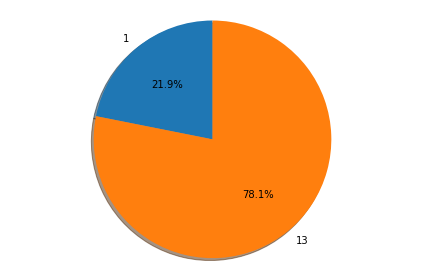

9999999986
115    30359.09
116    30359.09
Name: Income, dtype: float64


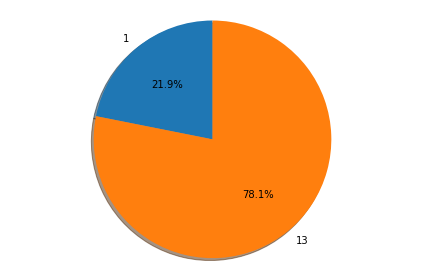

9999999987
117    30359.09
118    30359.09
119    30359.09
120    30359.09
121    30359.09
122    30359.09
Name: Income, dtype: float64


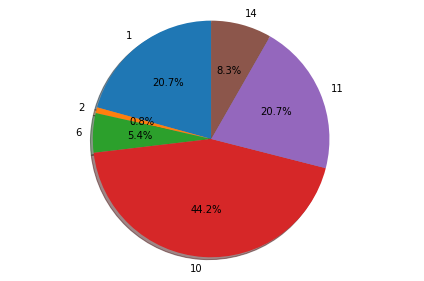

9999999987
117    30359.09
118    30359.09
119    30359.09
120    30359.09
121    30359.09
122    30359.09
Name: Income, dtype: float64


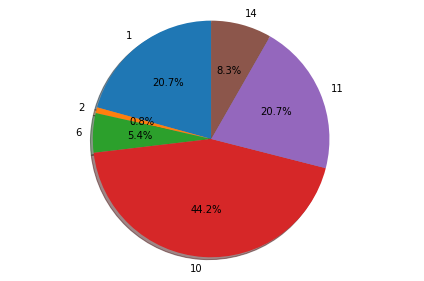

9999999987
117    30359.09
118    30359.09
119    30359.09
120    30359.09
121    30359.09
122    30359.09
Name: Income, dtype: float64


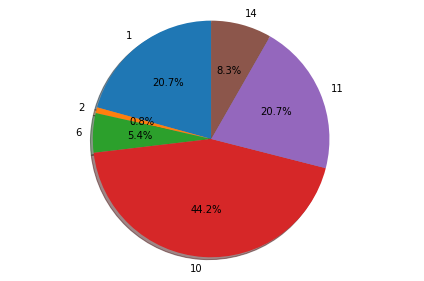

9999999987
117    30359.09
118    30359.09
119    30359.09
120    30359.09
121    30359.09
122    30359.09
Name: Income, dtype: float64


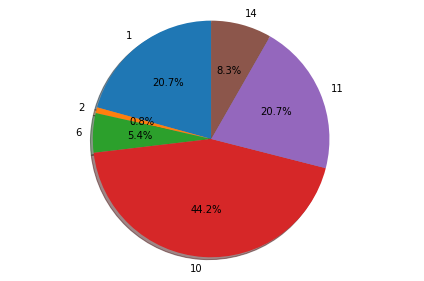

9999999987
117    30359.09
118    30359.09
119    30359.09
120    30359.09
121    30359.09
122    30359.09
Name: Income, dtype: float64


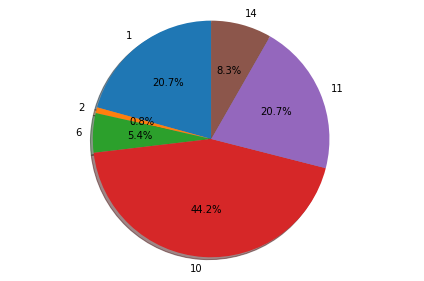

9999999987
117    30359.09
118    30359.09
119    30359.09
120    30359.09
121    30359.09
122    30359.09
Name: Income, dtype: float64


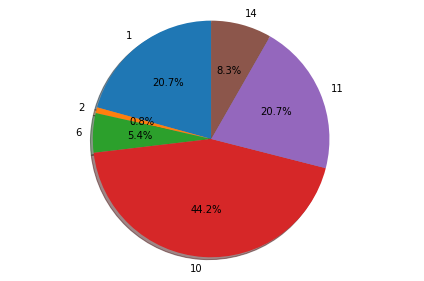

9999999988
123    45000.0
Name: Income, dtype: float64


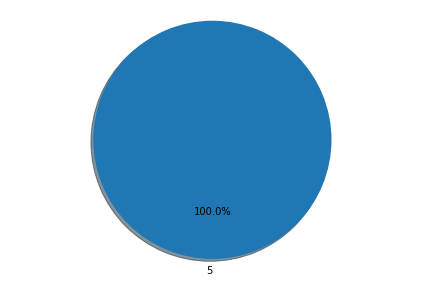

9999999989
124    100000.0
125    100000.0
Name: Income, dtype: float64


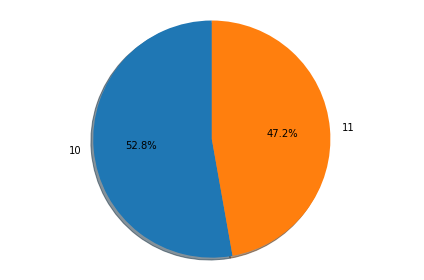

9999999989
124    100000.0
125    100000.0
Name: Income, dtype: float64


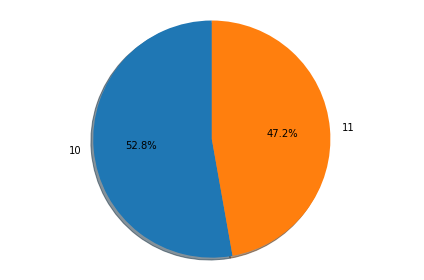

9999999990
126    37000.0
Name: Income, dtype: float64


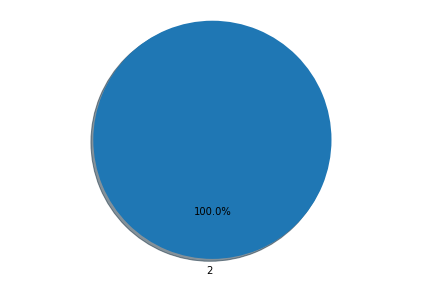

9999999991
127    42000.0
128    42000.0
Name: Income, dtype: float64


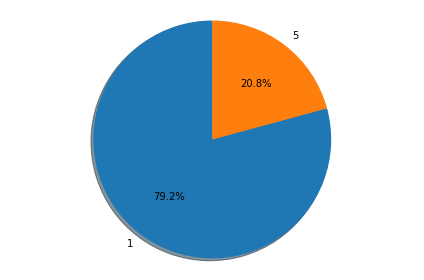

9999999991
127    42000.0
128    42000.0
Name: Income, dtype: float64


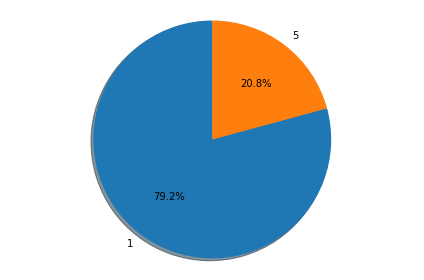

In [58]:
for user in p_df.User_id:
    df=p_df[p_df["User_id"]==user]
    label=df["Category"]
    values=df["Bill_Amount"]
    print(user)
    print(df.Income)
    # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(values,labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
    #plt.legend(title=df.Category,loc=3)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()

9000000006


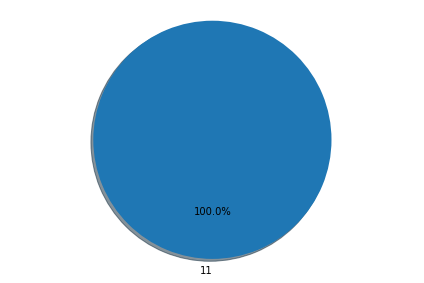

9123456780


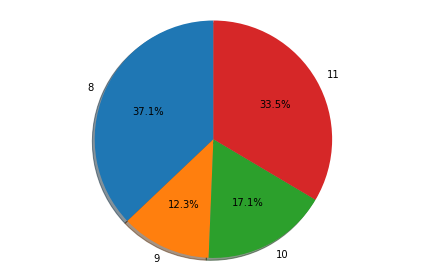

9123456781


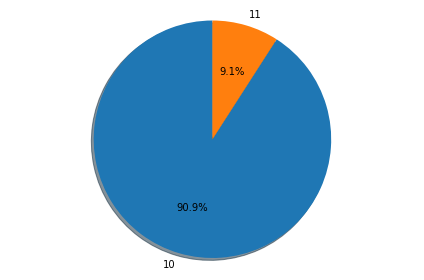

9123456782


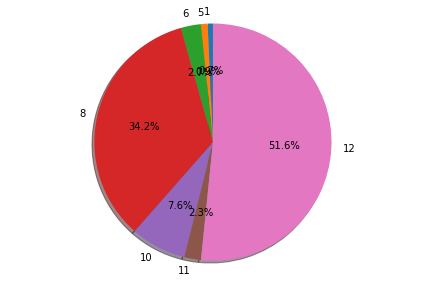

9123456783


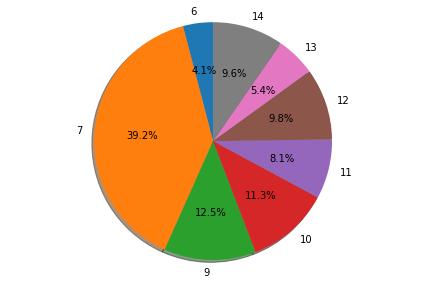

9123456784


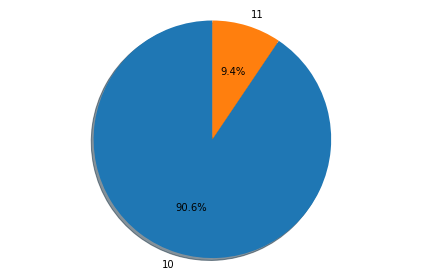

9123456785


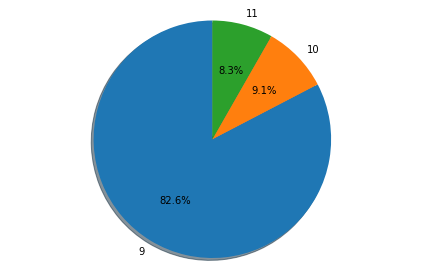

9123456786


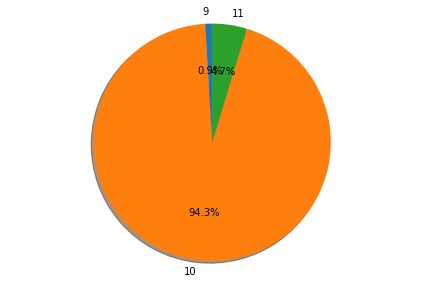

9123456787


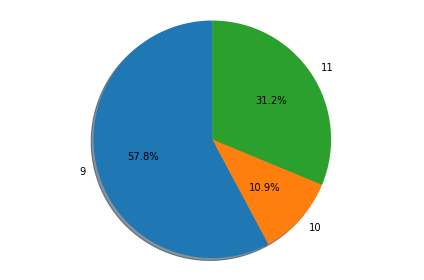

9123456788


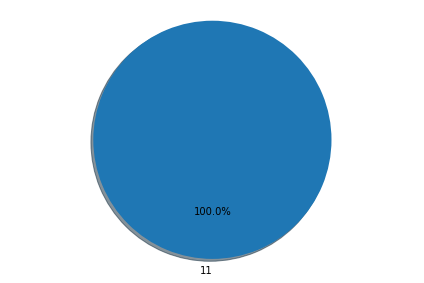

9123456789


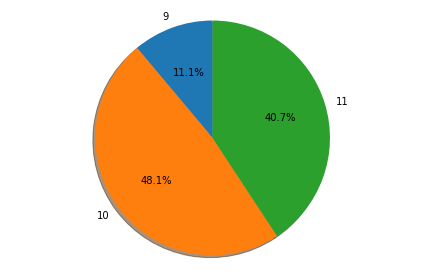

9123456790


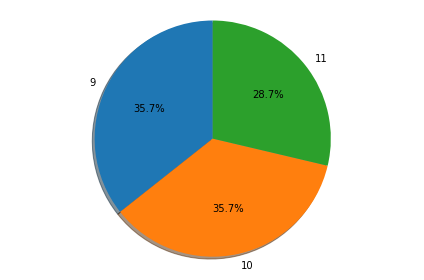

9123456791


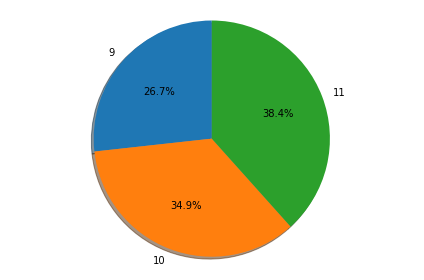

9123456792


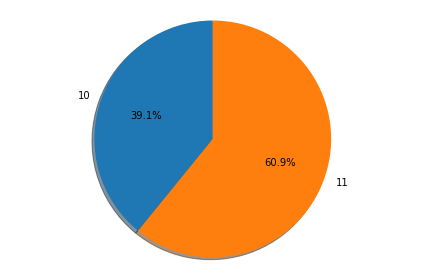

9123456793


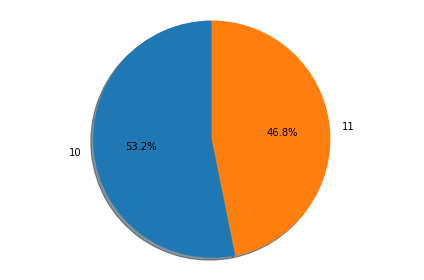

9123456794


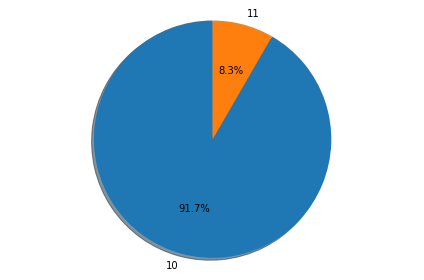

9123456795


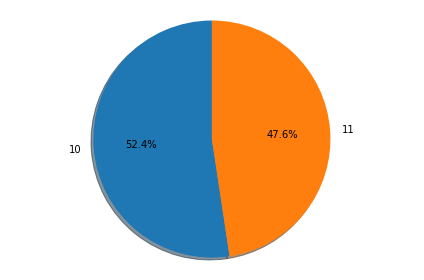

9123456796


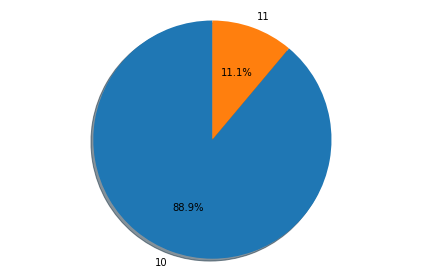

9123456797


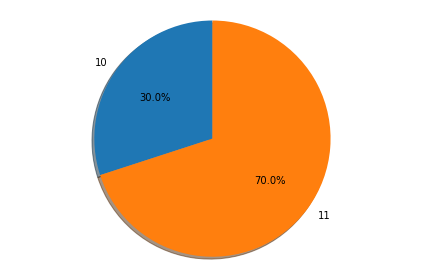

9123456798


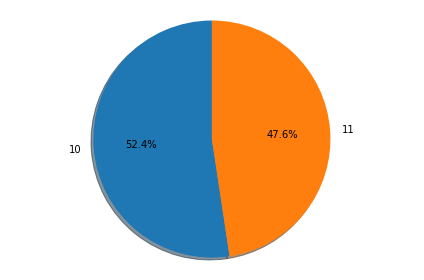

9123456799


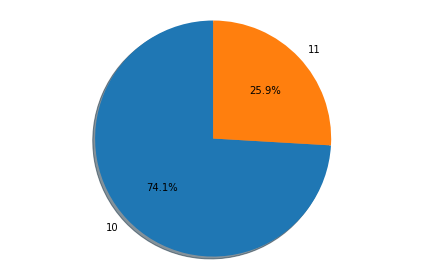

9999999971


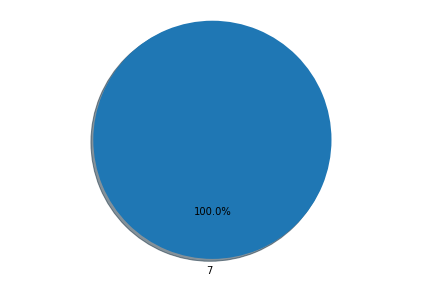

9999999972


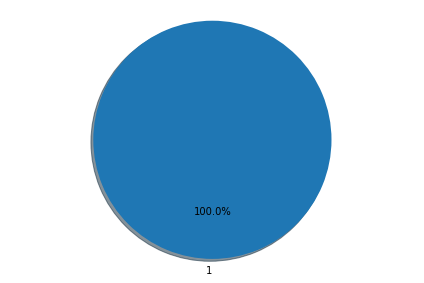

9999999973


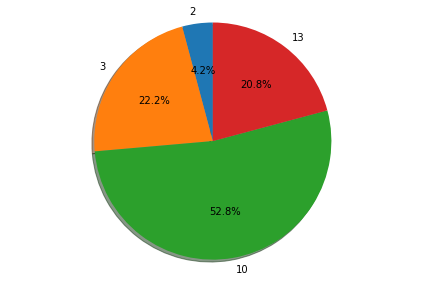

9999999974


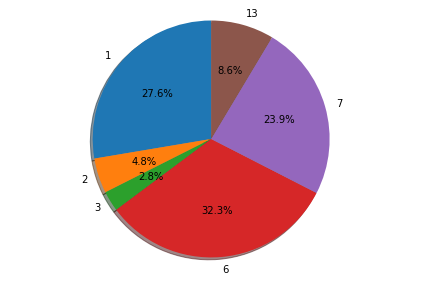

9999999975


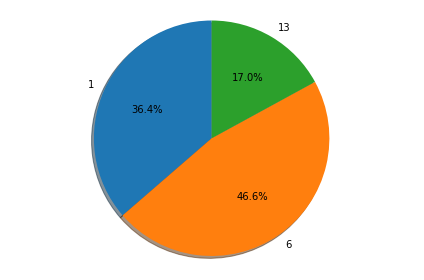

9999999976


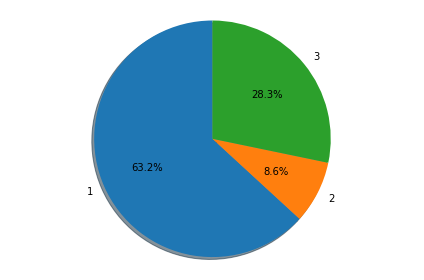

9999999977


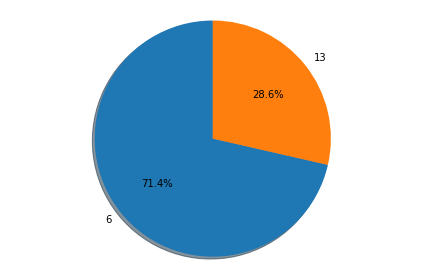

9999999978


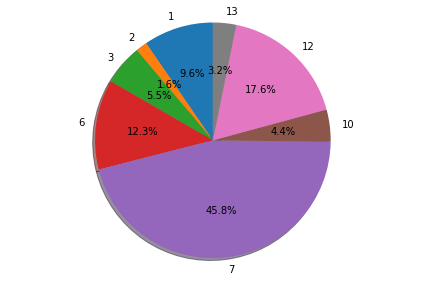

9999999979


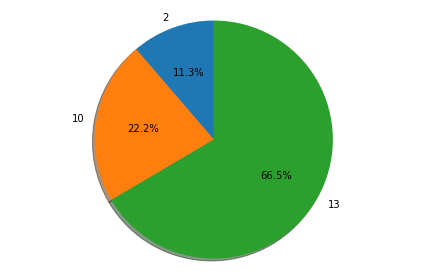

9999999980


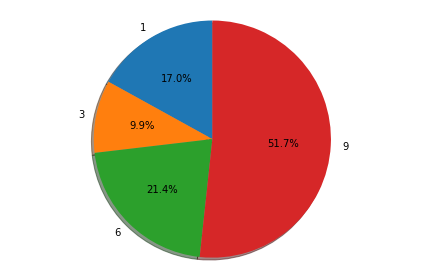

9999999981


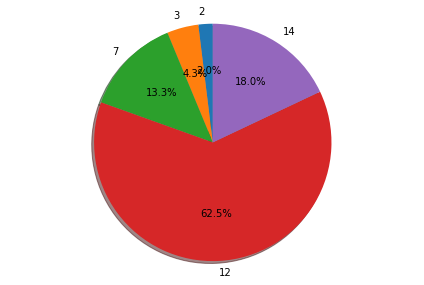

9999999982


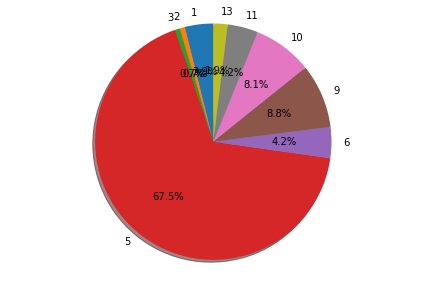

9999999983


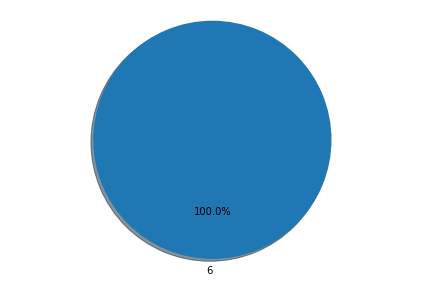

9999999984


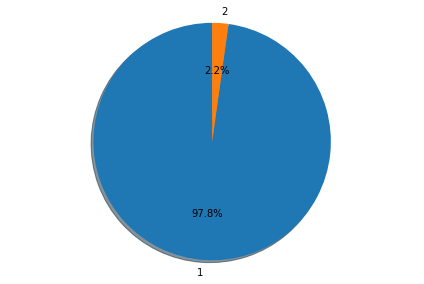

9999999985


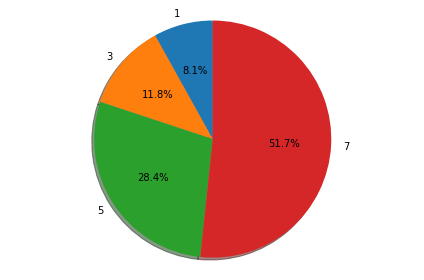

9999999986


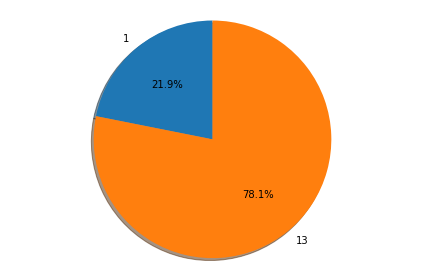

9999999987


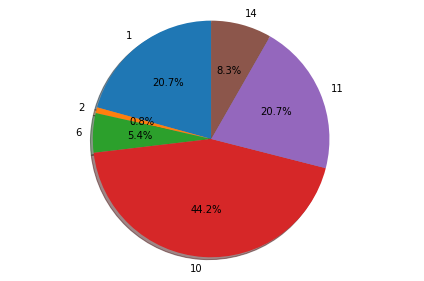

9999999988


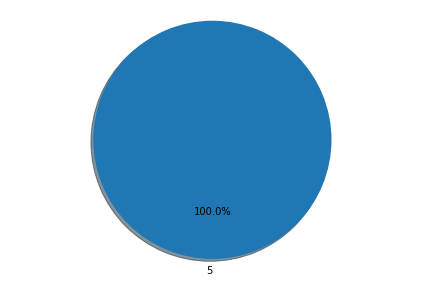

9999999989


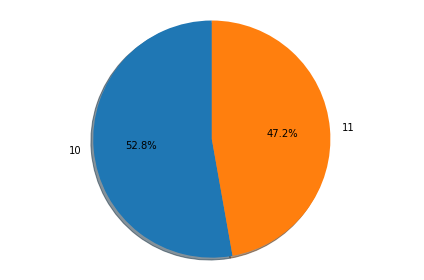

9999999990


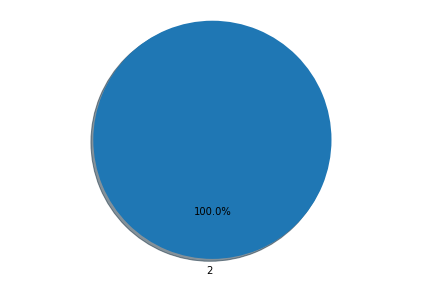

9999999991


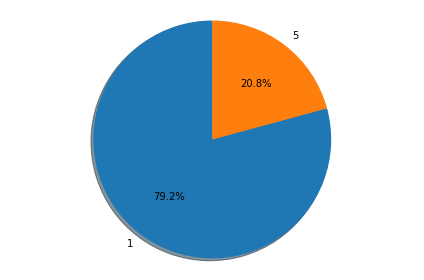

In [59]:
Unique_list=[]
for user in p_df.User_id:
    if(user not in Unique_list):
        Unique_list.append(user)
        df=p_df[p_df["User_id"]==user]
        print(user)
        label=df["Category"]
        values=df["Bill_Amount"]
        fig1, ax1 = plt.subplots()
        ax1.pie(values,labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
        # Equal aspect ratio ensures that pie is drawn as a circle
        ax1.axis('equal')  
        plt.tight_layout()
        plt.show()

In [ ]:
len(p_df.Bill_Amount)

In [ ]:
type(p_df)

In [ ]:
p_df.head()

In [ ]:
Unique_users=p_df.User_id.unique()

In [ ]:
#p_df.duplicated(p_df.groupby(["User_id","Category"]),keep=False)

#np.where(p_df.duplicated(["User_id","Category"],keep=False).apply(lambda x: tuple(x.index)).tolist())

In [ ]:
duplicate_df=p_df.groupby(["User_id","Category"]).apply(lambda x: list(x.index)).tolist()
duplicate_df

In [ ]:
print(type(duplicate_df[0:10]))
duplicate_df[0:10]
#duplicate_df[[2],[2]]

In [ ]:
#df_=np.array(duplicate_df)
#df_

In [ ]:
print(type(duplicate_df))

In [ ]:
mean_=p_df.groupby(["User_id","Category"], as_index=False).apply(lambda x : np.mean(tuple(p_df.Bill_Amount[x.index])))
len(mean_)

In [ ]:
p_df.groupby(["User_id","Category"], as_index=False).apply(lambda x : np.mean(tuple(p_df.Bill_Amount[x.index]))).tolist()

In [ ]:
mean_[128]

In [ ]:
p=[(e,duplicate_df.index(e))for i,e in enumerate(duplicate_df)if e in duplicate_df]
p

In [ ]:
p.apply()

In [ ]:
for 

In [ ]:
for i in range(len(duplicate_df)):
    for j in range(len(duplicate_df[i])):
        print(duplicate_df[i][j])
        p_df.Mean_Bill_Amount.iloc[duplicate_df[i][j]]=mean_[duplicate_df.index(duplicate_df[i][j])]

In [ ]:
for i,e in enumerate(duplicate_df):
    p_df.Mean_Bill_Amount.iloc[[len(k) for k in duplicate_df]]=mean_[i]

In [ ]:
p_df.Mean_Bill_Amount.iloc[[e[a]for a in i.iteritem()]]=mean_[i]

In [ ]:
for i,e in enumerate(duplicate_df):
    print(i)
    print(e)
    length=len(e)-1   
    #print(length)

In [ ]:
map(lambda x: x[0], a)



for i in range(0,len(duplicate_df)):
    p_df.Mean_Bill_Amount.iloc[[len(k) for k in duplicate_df]]=mean_[i]
        
        
    
        

In [ ]:
[x for x, y in enumerate(tuple_list) if y[0] == 7]

In [ ]:
for i,e in enumerate(duplicate_df):
    length=len(e)-1   
    #print(length)
    for a in e[i].items():
        print(a)
    #p_df.Mean_Bill_Amount.iloc[[e[a]for a in i.iteritem()]]=mean_[i]

In [ ]:
for i in duplicate_df:
    print(i)

In [ ]:
"""for key in keys:
    for row in p_df.get_group(key).iterrows():
        #p_df["Mean_Bill_Amount"].iloc[int(row[0])]=int(row['Bill_Amount']).mean()
        print(row)"""
      



In [ ]:
mean_amount=[]
for i in range(0,len(p.Bill_Amount)):
    mean_amount.append(p.Bill_Amount.iloc[i])

print(mean_amount)
#p_df.iloc["Mean_Bill_Amount"]

In [ ]:
"""for x in p_df.User_id.items():
    for c in p_df.Category.items():
        p_df.Mean_Bill_Amount.loc[x[0]]=p_df.Bill_Amount.iloc[x[0]].mean()"""


In [ ]:
Mean_Bill_Amount_=p_df[["User_id","Category","Bill_Amount"]].mean(axis=0)
Mean_Bill_Amount_ 

In [ ]:
Mean_Bill_Amount=[]
for user in Users2_data.User_id:
    for cat in Users2_data.Category:
        Mean_Bill_Amount.append(Users2_data.Bill_Amount.mean())


In [ ]:
print(Mean_Bill_Amount[5])
type(Mean_Bill_Amount)
Mean_Bill_Amount=pd.DataFrame(Mean_Bill_Amount)
type(Mean_Bill_Amount)

In [ ]:
Mean_Bill_Amount.head(1)
Mean_Bill_Amount.shape

In [ ]:
#Mean_Bill_Amount.T

In [ ]:
for user,cat in Mean_Bill_Amount:
    print(user)
    print(cat)

In [ ]:
#impute_grps = p_df.pivot_table(values=["Bill_Amount"], index=["User_id","Category"], aggfunc=np.mean)
#print(impute_grps)
#print(impute_grps.columns)

In [ ]:
for row_index,x, in keys:
    for index in range(0,len(p_df):
                       new_df=[p_df[(Users2_data.User_id.iloc[index] == row_index) & (Users2_data.Category.iloc[index] == x),Users2_data["Bill_Amount"].iloc["index"].mean()] )] 

In [ ]:
 #df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

In [ ]:
new_df=[p_df.loc[(Users2_data["User_id"]== x[0]) & (Users2_data["Category"]== x[1]),Users2_data["Bill_Amount"].mean()] for x in keys]